<a href="https://colab.research.google.com/github/Cat0412/2024-1-my-BDA/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C_01%EC%A1%B0_20214218_%EC%96%91%ED%9D%AC_20202214_%EC%9C%A0%ED%9C%98%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **타이타닉호 데이터분석**

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns

!pip install koreanize_matplotlib

df = sns.load_dataset(('titanic'))
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


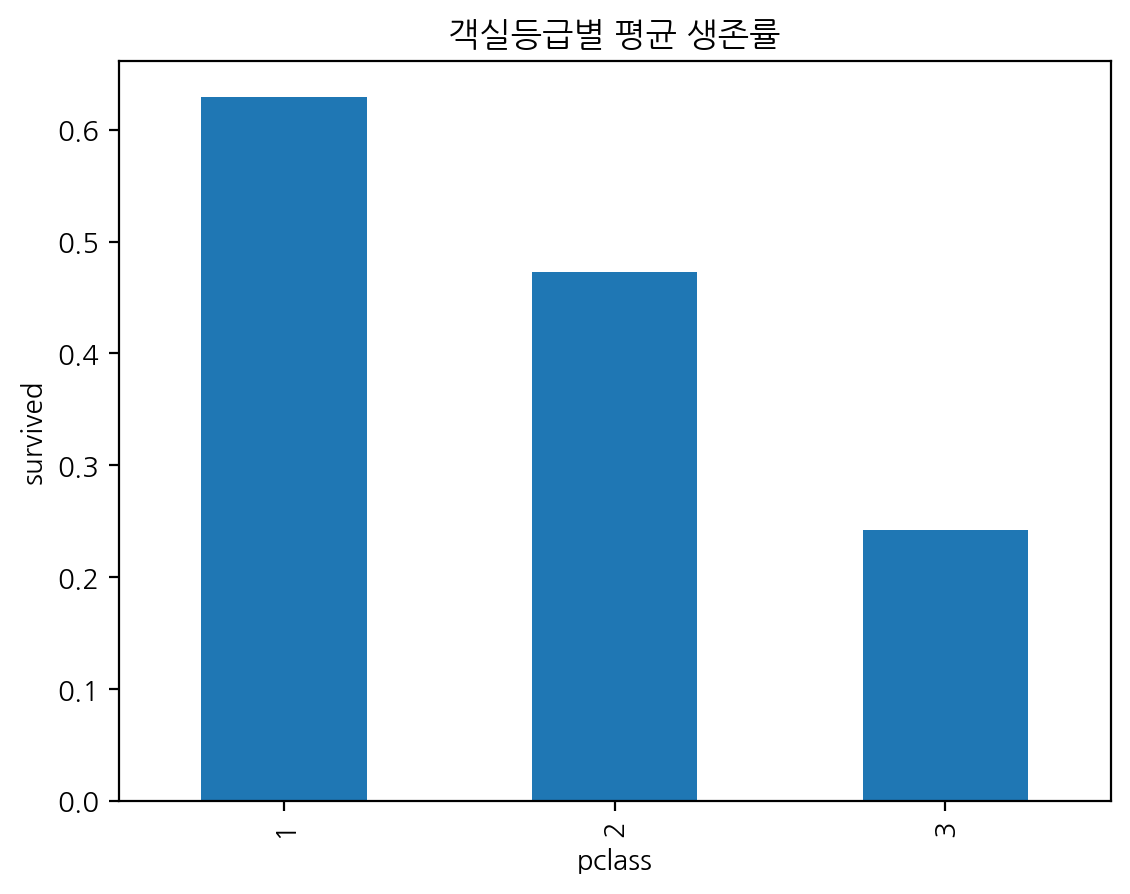

In [197]:
# 클래스별 평균 생존
import koreanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt

df.groupby('pclass')['survived'].mean().plot(kind='bar')
plt.xlabel('pclass')
plt.ylabel('survived')
plt.title('객실등급별 평균 생존률')
plt.show()

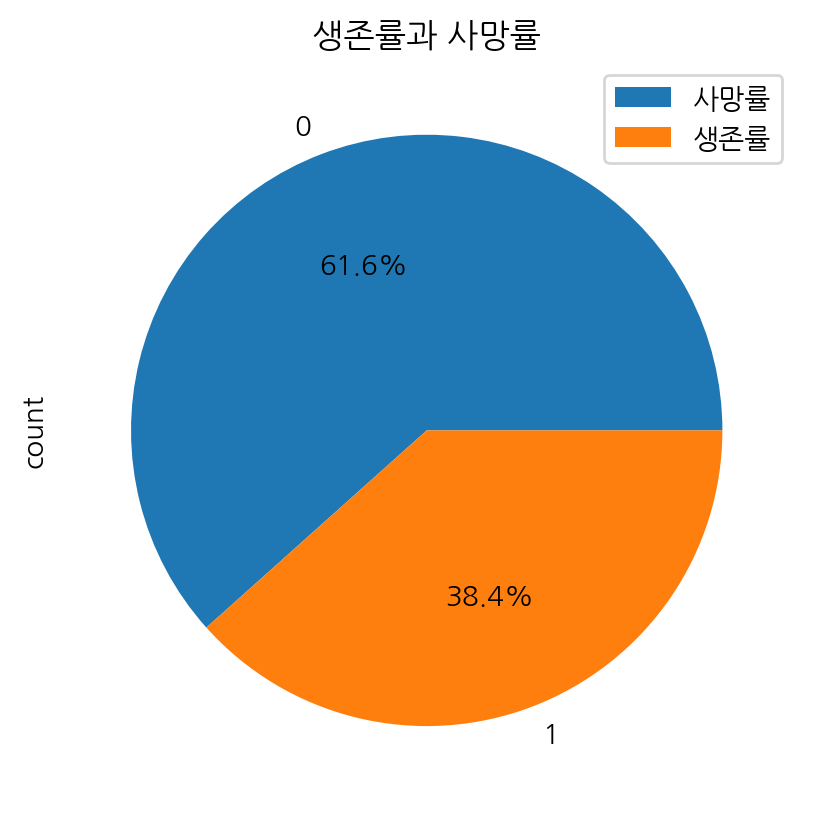

In [198]:
# 생존률 원 그래프

df['survived'].value_counts().plot(kind='pie', autopct = '%1.1f%%' )
plt.title('생존률과 사망률')
plt.legend(labels=['사망률', '생존률'])

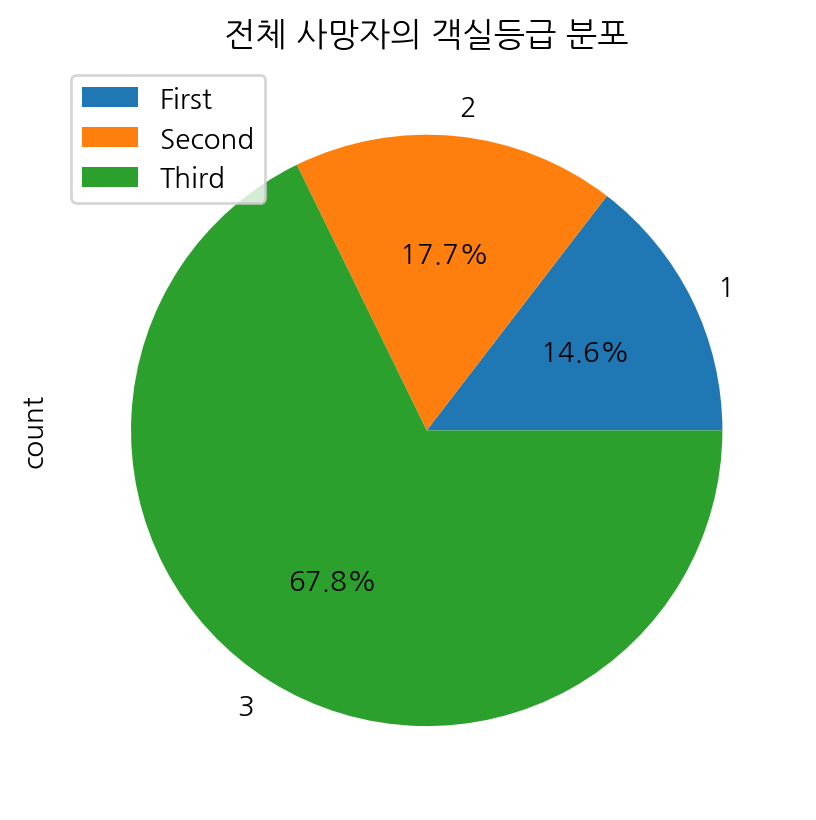

In [199]:
# 전체 사망자의 객실등급 분포
# 전체 사망자의 대부분(약 70%)이 3등급 객실임을 알 수 있음
df[df['survived']==0]['pclass'].value_counts().sort_index().plot(kind='pie', autopct = '%1.1f%%')
plt.title('전체 사망자의 객실등급 분포')
plt.legend(labels=['First', 'Second', 'Third'],loc="upper left")

Text(0.5, 1.0, '객실등급별 사망자의 평균나이')

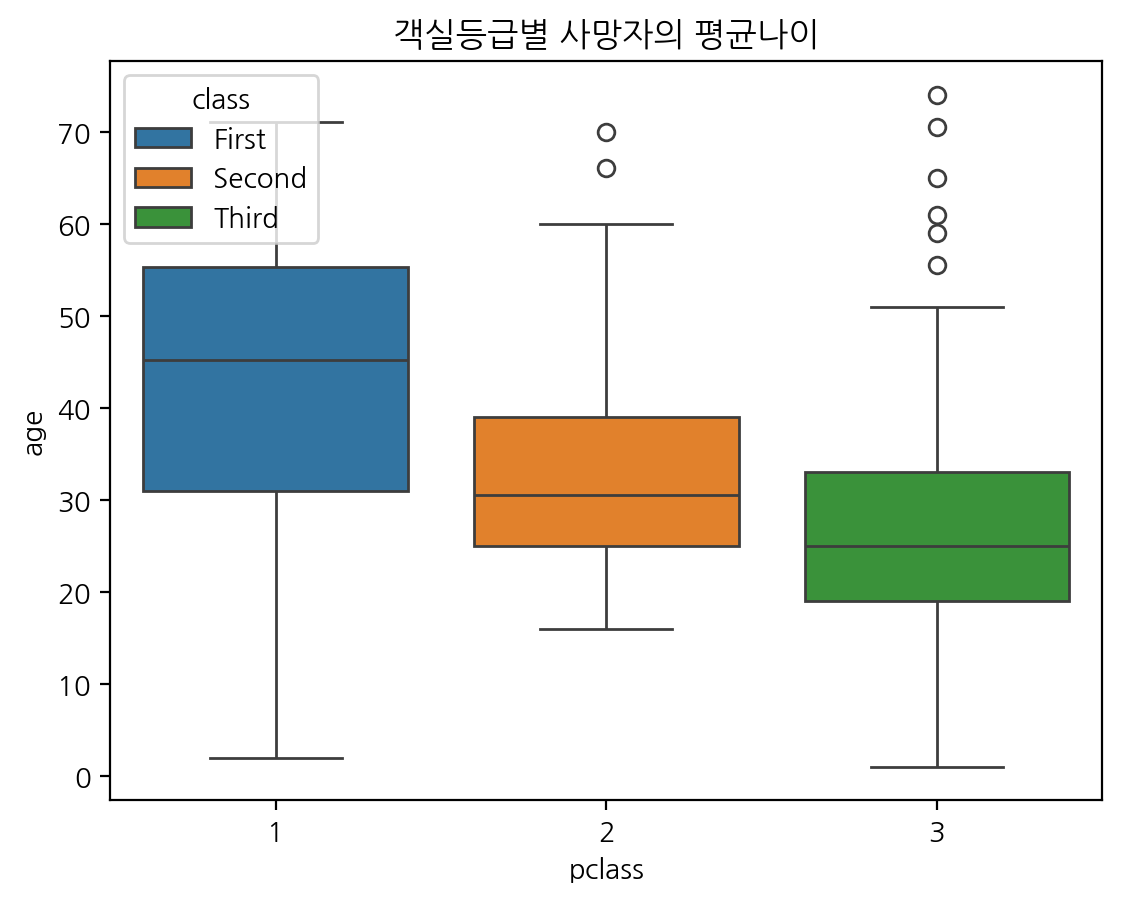

In [201]:
# 각 클래스별 사망자 평균 나이 box plot

dead_mean_age_by_class = df[df['survived']== 0].groupby('pclass')['age'].mean().reset_index()

sns.boxplot(df[df['survived']==0],x='pclass', y='age', hue='class')
plt.title('객실등급별 사망자의 평균나이')
#1등급에서 2등급, 3등급으로 내려갈 수록 사망자의 평균 나이가 낮아짐

In [202]:
# 탑승객 평균 나이
df['age'].mean().round()

30.0

<Axes: xlabel='age', ylabel='Count'>

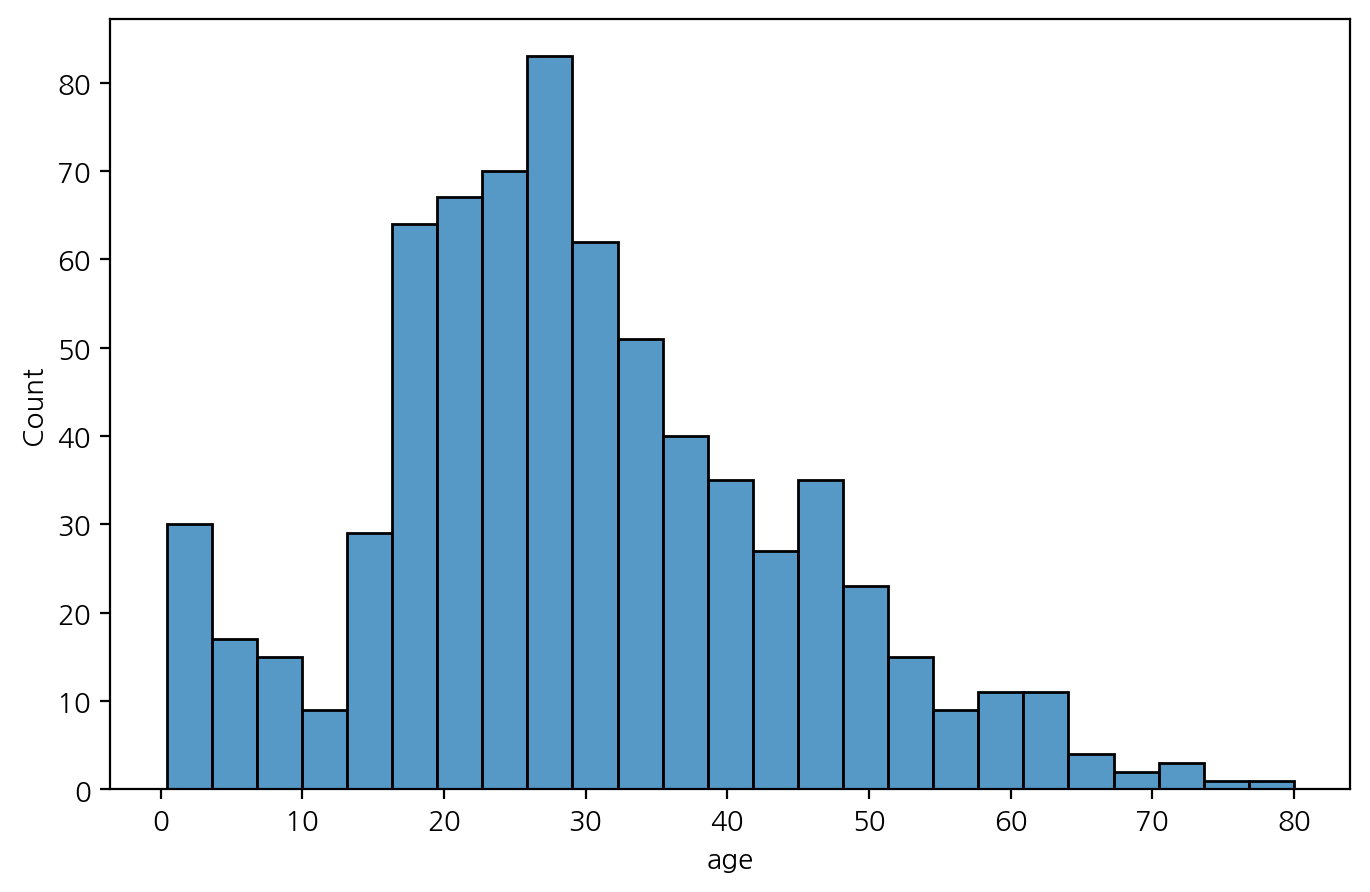

In [203]:
# 탑승객 나이 분포
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=25)

<ipython-input-205-d9b9caf16430>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='pclass', y='age', data=df, palette='viridis')


Text(0, 0.5, 'Age')

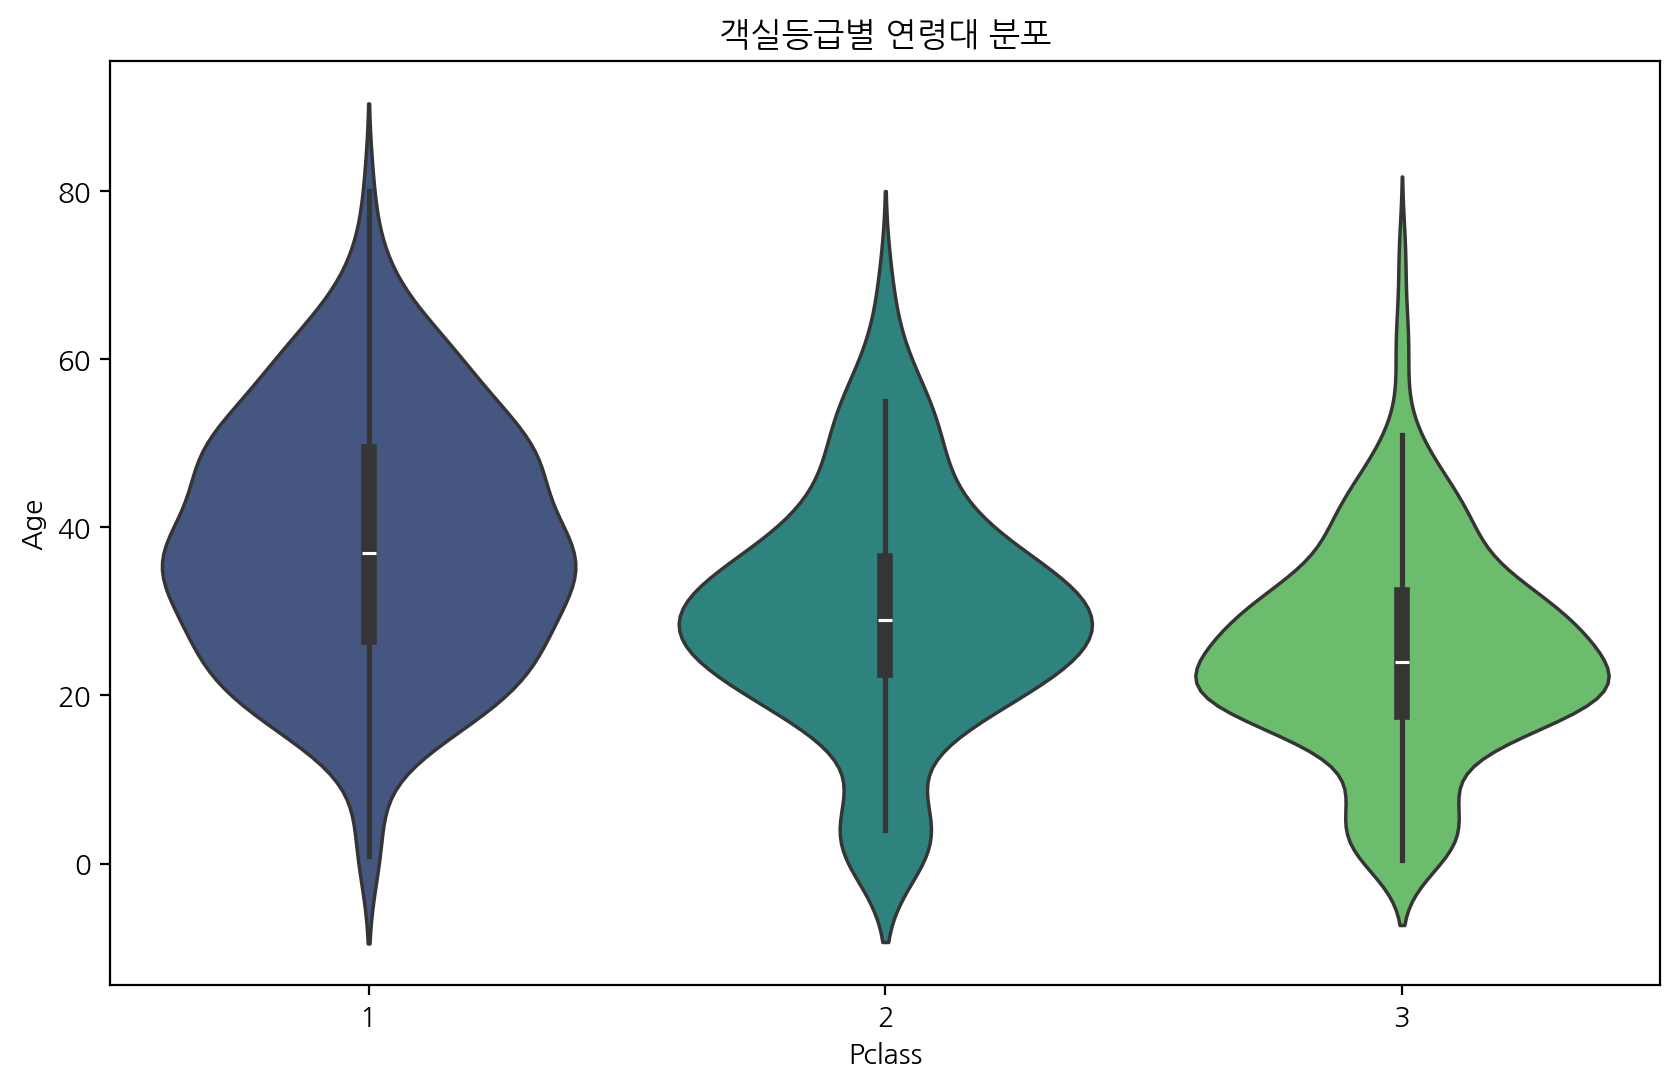

In [205]:
# 바이올린 그래프로 'age' 시각화 (pclass 별 평균 나이)
# 1등급 객실에서 3등급 객실로 내려갈수록 평균나이가 낮아짐을 알 수 있음
plt.figure(figsize=(10, 6))
sns.violinplot(x='pclass', y='age', data=df, palette='viridis')
plt.title('객실등급별 연령대 분포')
plt.xlabel('Pclass')
plt.ylabel('Age')

<ipython-input-208-8d47095c5696>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='alone', y='survived', palette='viridis')


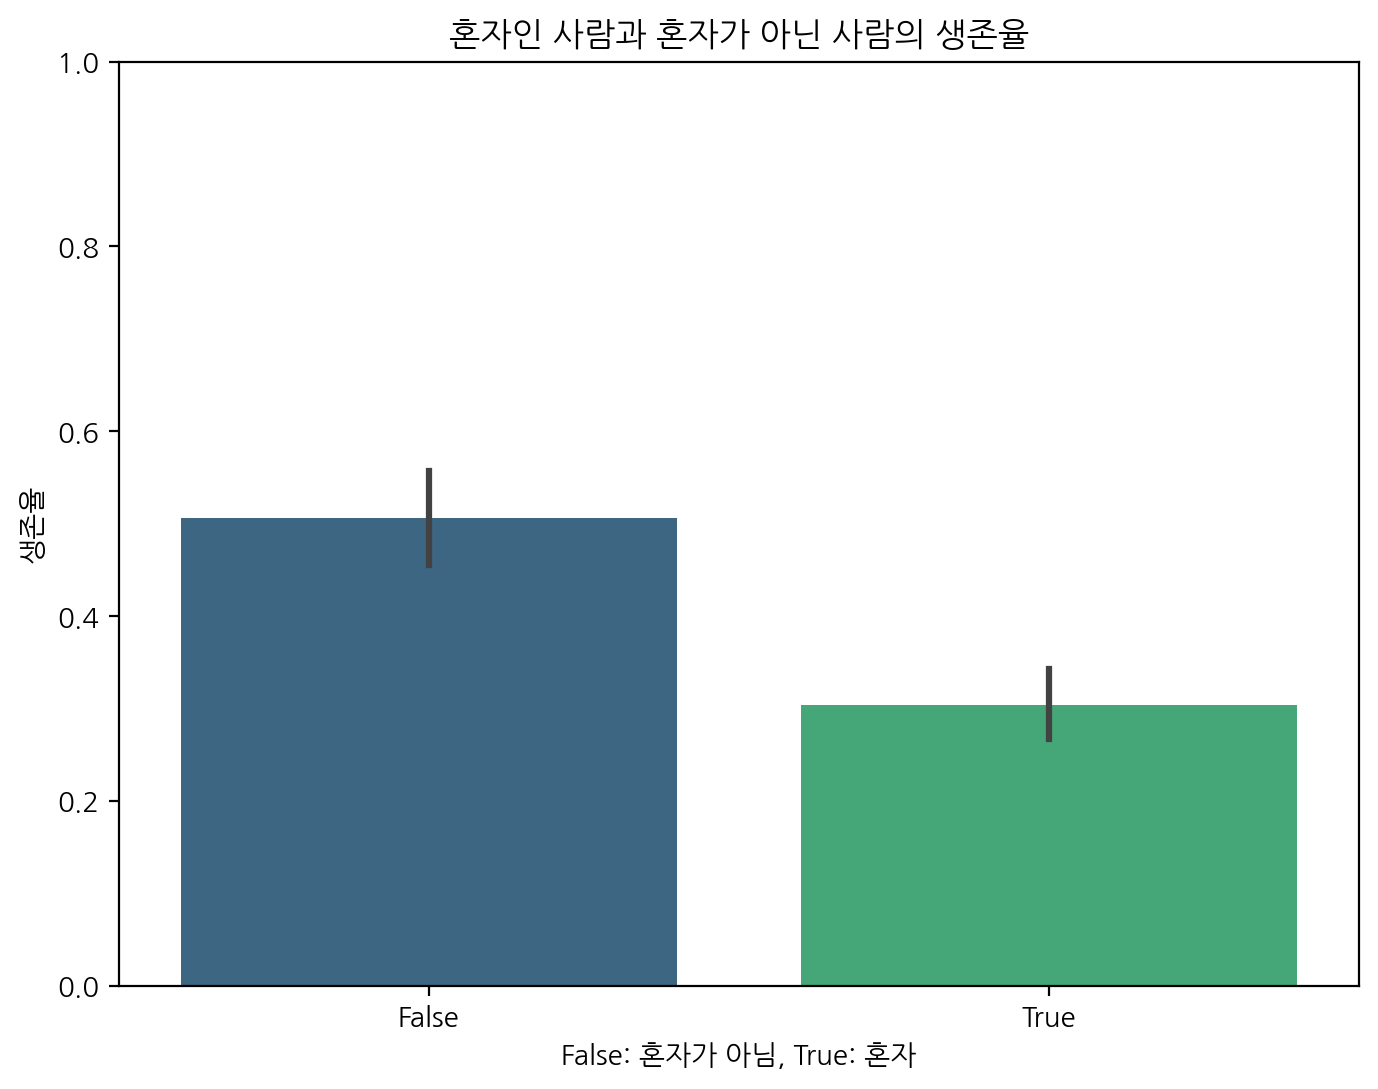

In [208]:
# 혼자인 사람 혼자가 아닌 사람 생존율
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='alone', y='survived', palette='viridis')
plt.title('혼자인 사람과 혼자가 아닌 사람의 생존율')
plt.xlabel('False: 혼자가 아님, True: 혼자')
plt.ylabel('생존율')
plt.ylim(0, 1)
plt.show()
# 혼자가 아닌 사람의 생존률이 더 높았음을 알 수 있다.

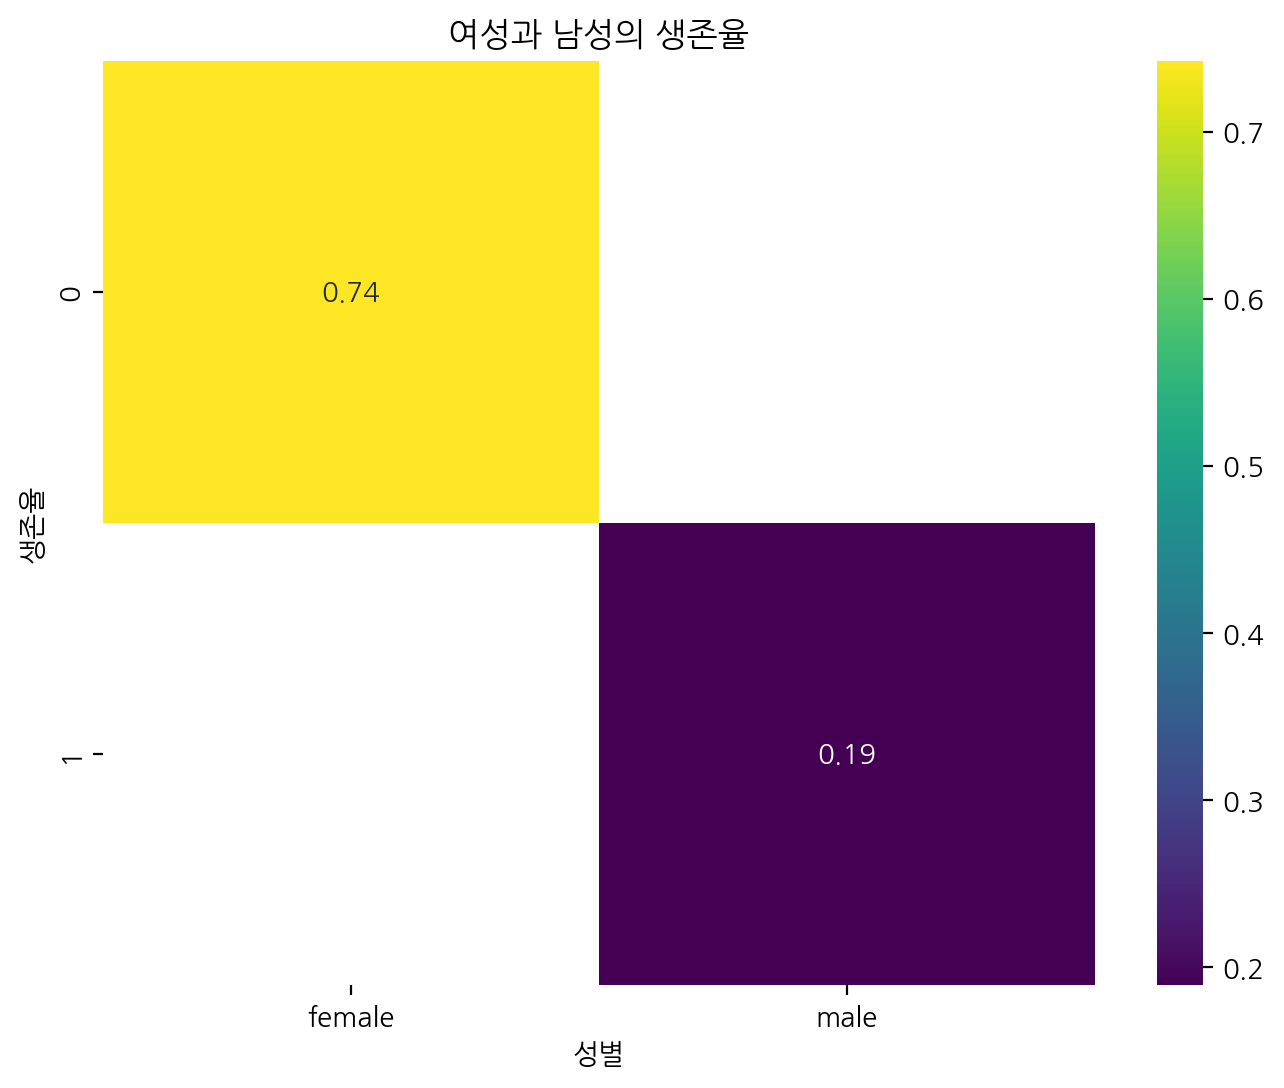

In [210]:
# 남성 여성 생존율 히트맵으로 나타내기

# 성별에 따른 생존율 계산
survival_rates = df.groupby('sex')['survived'].mean().reset_index()

# 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(data=survival_rates.pivot(columns='sex', values='survived'), annot=True, cmap='viridis', fmt=".2f")
plt.title('여성과 남성의 생존율')
plt.xlabel('성별')
plt.ylabel('생존율')
plt.show()
#여성이 압도적으로 많이 생존했음을 알 수 있음

# **서울시 자치구별 상권 유동인구수, 직장인구수, 요일별 유동인구수, 연령대별 유동인구수를 분석해 상권매출과의 상관성을 분석**

##데이터 전처리
- 데이터 출처: 서울열린데이터광장-서울시 상권분석서비스 (https://data.seoul.go.kr/)
- 데이터셋: 유동인구, 상권매출, 직장 인구, 거주 인구
- 피어슨상관계수 그래프 사진 출처: https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

In [161]:
import site
site.getsitepackages()
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설치 (Google Colab 환경)
!apt-get update -qq
!apt-get install -y fonts-nanum

# 설치된 폰트 목록 갱신 및 설정
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# matplotlib의 기본 폰트를 NanumGothic으로 설정
plt.rcParams['font.family'] = 'NanumGothic'
!pip install koreanize_matplotlib
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


In [162]:
# CSV 파일을 DataFrame으로 변환
df = pd.read_csv('data/df_total_cluster.csv')
df

,cluster,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,52,2.458569e+10,930243,1.689973e+10,7.685965e+09,2.894085e+09,3.361057e+09,3.458404e+09,3.495048e+09,3.691136e+09,...,1190,2061,1568,477,15,776,1744,1808,904,367
1,57,5.022990e+11,24443541,4.075810e+11,9.471834e+10,7.755466e+10,7.960285e+10,8.084214e+10,8.426763e+10,8.531337e+10,...,4459,4063,3095,1599,29,2449,3388,2597,1497,574
2,32,2.699820e+12,80300138,2.133230e+12,5.665870e+11,3.898760e+11,4.247370e+11,4.200570e+11,4.418910e+11,4.566730e+11,...,25209,26518,18020,6168,859,15893,20356,15645,7402,3161
3,39,4.231420e+11,21995549,2.999190e+11,1.232240e+11,5.441923e+10,5.822786e+10,5.885921e+10,6.115151e+10,6.726094e+10,...,3721,5061,5729,959,34,1461,2015,1619,996,520
4,73,3.881360e+12,105788430,3.063650e+12,8.177150e+11,5.731510e+11,6.027620e+11,6.257250e+11,6.299960e+11,6.320110e+11,...,18616,16581,11622,4933,723,16457,15049,12536,9312,3631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,41,2.588670e+12,68054000,2.032470e+12,5.561920e+11,4.000010e+11,3.947930e+11,3.849680e+11,4.069300e+11,4.457830e+11,...,6607,7326,5695,7262,75,3037,3446,3258,4071,3726
72,24,6.498040e+11,23011404,5.247720e+11,1.250320e+11,1.046100e+11,9.613571e+10,9.679624e+10,1.037420e+11,1.234880e+11,...,1692,2057,1958,2359,9,578,834,1144,1259,1134
73,5,9.970500e+11,39592252,7.253950e+11,2.716550e+11,1.395760e+11,1.398170e+11,1.420870e+11,1.413650e+11,1.625500e+11,...,2702,2852,2848,3552,35,1591,1754,1811,1908,1356
74,69,1.037070e+12,47113110,7.755110e+11,2.615640e+11,1.498840e+11,1.498490e+11,1.494660e+11,1.498720e+11,1.764400e+11,...,1586,1977,1866,2125,21,973,1237,1806,2313,1660


In [163]:
# csv파일 읽어오기
m = pd.read_csv('data/cluster_자치구_mapping.csv')
m

,밀집지역,군집번호,자치구
0,불광역,1,은평구
1,양천향교역,2,강서구
2,광나루역,3,광진구
3,내방역,4,서초구
4,삼전역,5,송파구
...,...,...,...
71,효창공원,72,용산구
72,동대문,73,종로구
73,동묘앞,74,종로구
74,중곡동,75,광진구


In [164]:
# 컬럼명 수정
m.rename(columns={'군집번호': 'cluster'}, inplace=True)
m

,밀집지역,cluster,자치구
0,불광역,1,은평구
1,양천향교역,2,강서구
2,광나루역,3,광진구
3,내방역,4,서초구
4,삼전역,5,송파구
...,...,...,...
71,효창공원,72,용산구
72,동대문,73,종로구
73,동묘앞,74,종로구
74,중곡동,75,광진구


In [165]:
#df와 m을 cluster를 기준으로 merge해 df_tot변수에 할당
df_tot = pd.merge(m,df)
df_tot

,밀집지역,cluster,자치구,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,불광역,1,은평구,8.325540e+11,25480849,5.681680e+11,2.643860e+11,1.074240e+11,1.069400e+11,1.112860e+11,...,1036,1515,1483,1407,12,496,727,750,1052,814
1,양천향교역,2,강서구,1.588440e+11,6734285,1.209250e+11,3.791919e+10,2.359092e+10,2.406520e+10,2.316100e+10,...,2043,1325,665,312,13,880,760,426,332,153
2,광나루역,3,광진구,9.200320e+11,34599554,7.147410e+11,2.052910e+11,1.352720e+11,1.478270e+11,1.366820e+11,...,7666,7963,5403,4763,136,4285,4867,4552,3727,2113
3,내방역,4,서초구,1.452750e+12,66159260,1.126510e+12,3.262450e+11,2.163670e+11,2.221530e+11,2.153840e+11,...,4522,4712,4046,4675,58,2383,3120,3392,2559,1676
4,삼전역,5,송파구,9.970500e+11,39592252,7.253950e+11,2.716550e+11,1.395760e+11,1.398170e+11,1.420870e+11,...,2702,2852,2848,3552,35,1591,1754,1811,1908,1356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,효창공원,72,용산구,2.419130e+12,74557381,1.745610e+12,6.735190e+11,3.253590e+11,3.336650e+11,3.430280e+11,...,811,917,759,773,6,486,597,594,533,399
72,동대문,73,종로구,3.881360e+12,105788430,3.063650e+12,8.177150e+11,5.731510e+11,6.027620e+11,6.257250e+11,...,18616,16581,11622,4933,723,16457,15049,12536,9312,3631
73,동묘앞,74,종로구,5.769950e+11,27503079,4.247390e+11,1.522570e+11,8.257252e+10,8.423255e+10,8.154021e+10,...,1555,1687,1476,1346,52,1194,1107,1294,1505,529
74,중곡동,75,광진구,8.889920e+11,29879945,7.472320e+11,1.417600e+11,1.329730e+11,1.556140e+11,1.538950e+11,...,8359,7538,5037,3554,223,4369,3903,3006,2379,1077


In [166]:
df_tot.describe()

,cluster,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
count,76.000000,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,...,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.00000,76.000000
mean,38.500000,1.171401e+12,4.106395e+07,8.773794e+11,2.940222e+11,1.642610e+11,1.716312e+11,1.720882e+11,1.750854e+11,1.943139e+11,...,6196.842105,5943.907895,4341.421053,2559.763158,90.605263,4025.289474,4356.947368,3329.539474,2546.75000,1237.144737
std,22.083176,1.174855e+12,3.195086e+07,8.811796e+11,3.285731e+11,1.640147e+11,1.723280e+11,1.750929e+11,1.788324e+11,1.922037e+11,...,10345.630910,9364.529945,5845.694544,2670.550474,183.066842,7660.829095,7875.828217,4985.760643,3494.21725,1517.283807
min,1.000000,1.357482e+10,2.981910e+05,7.609760e+09,5.965061e+09,1.476019e+09,1.299896e+09,1.704250e+09,1.486130e+09,1.643465e+09,...,85.000000,79.000000,87.000000,70.000000,0.000000,33.000000,70.000000,74.000000,104.00000,66.000000
25%,19.750000,4.569850e+11,2.031521e+07,3.459280e+11,1.001745e+11,6.490299e+10,6.675219e+10,6.630332e+10,6.744181e+10,7.552453e+10,...,1022.500000,1022.750000,1029.500000,843.750000,10.000000,577.500000,720.500000,682.500000,663.75000,378.750000
50%,38.500000,7.942040e+11,3.349307e+07,5.826020e+11,1.998960e+11,1.099835e+11,1.117185e+11,1.143970e+11,1.135650e+11,1.323325e+11,...,1975.000000,2059.000000,1938.000000,1449.500000,18.500000,1111.500000,1202.500000,1363.500000,1264.00000,691.500000
75%,57.250000,1.203675e+12,4.649221e+07,9.499778e+11,2.835025e+11,1.777748e+11,1.936185e+11,1.884862e+11,1.893470e+11,2.057638e+11,...,5600.750000,5791.500000,5035.500000,3292.500000,58.000000,3222.750000,3519.750000,3342.500000,2682.00000,1422.000000
max,76.000000,4.928830e+12,1.650317e+08,3.674130e+12,1.717350e+12,7.330120e+11,7.015610e+11,7.395350e+11,7.461570e+11,7.538650e+11,...,49146.000000,47048.000000,32573.000000,13043.000000,940.000000,50789.000000,49052.000000,26139.000000,16958.00000,9951.000000


In [167]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Columns: 180 entries, 밀집지역 to 여성연령대_60_이상_직장_인구_수
dtypes: float64(77), int64(100), object(3)
memory usage: 107.0+ KB


In [168]:
df_tot.shape

(76, 180)

## 자치구별 유동인구 분석

In [169]:
# df_pop(population) 유동인구수 변수를 만들어 df_tot 변수에서 남,녀 유동인구수 데이터만 추출해 할당.
df_pop = df_tot[['자치구', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수']]\
.groupby('자치구', as_index = False).mean().round().sort_values('총_유동인구_수',ascending = False)
df_pop

,자치구,총_유동인구_수,남성_유동인구_수,여성_유동인구_수
4,관악구,120109778.0,56455010.0,63654775.0
16,성북구,105536746.0,49953082.0,55583665.0
14,서초구,102817785.0,49253671.0,53564116.0
7,금천구,96483522.0,47897657.0,48585870.0
11,동작구,92901024.0,44263551.0,48637469.0
23,중구,83954499.0,43245872.0,40708635.0
15,성동구,83356344.0,38051997.0,45304351.0
22,종로구,79477004.0,38368252.0,41108754.0
17,송파구,78570722.0,37804215.0,40766504.0
0,강남구,73431618.0,35187771.0,38243850.0


<ipython-input-170-b38934dcaf87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='자치구', y='총_유동인구_수',palette = "flare", data = df_pop).set_title("유동인구수")


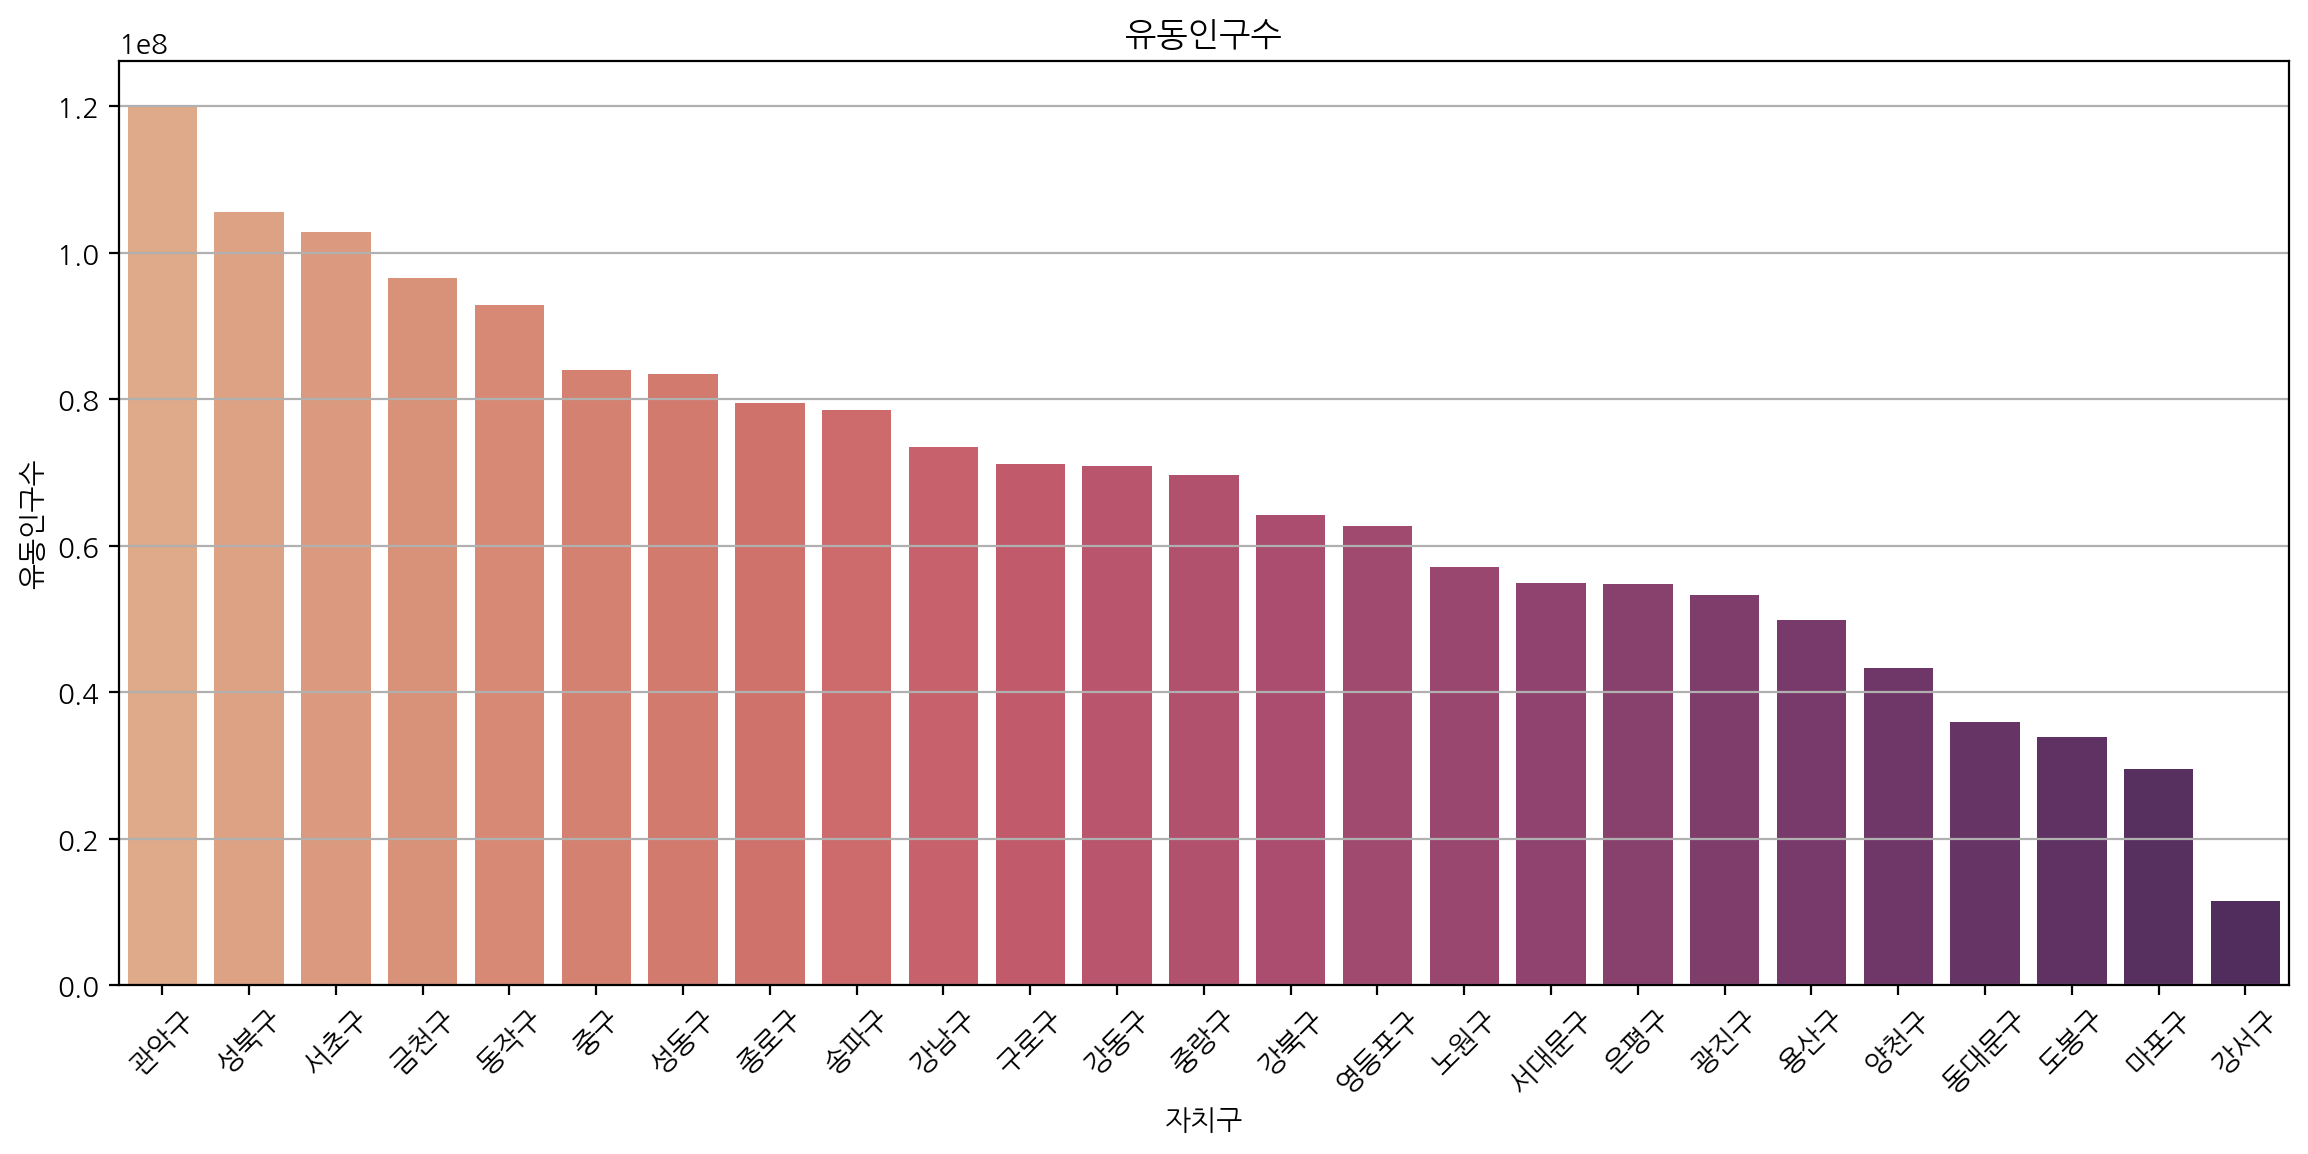

In [170]:
#자치구별 유동인구수를 barplot을 이용해 시각화
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x='자치구', y='총_유동인구_수',palette = "flare", data = df_pop).set_title("유동인구수")
ax.set(xlabel="자치구", ylabel = "유동인구수")
plt.xticks(rotation=45)
plt.grid(True, axis = 'y')
plt.show()

In [171]:
# 유동인구수 상위5개의 자치구를 추출
df_pop_top5  = df_pop.sort_values('총_유동인구_수', ascending = False).head(5)
df_pop_top5

,자치구,총_유동인구_수,남성_유동인구_수,여성_유동인구_수
4,관악구,120109778.0,56455010.0,63654775.0
16,성북구,105536746.0,49953082.0,55583665.0
14,서초구,102817785.0,49253671.0,53564116.0
7,금천구,96483522.0,47897657.0,48585870.0
11,동작구,92901024.0,44263551.0,48637469.0


## 자치구별 직장인구 분석

In [172]:
#df_job변수에 자치구별 직장인구수를 할당
df_job = df_tot[['자치구', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수']]\
.groupby('자치구',as_index = False).mean().round().sort_values('총_직장_인구_수',ascending = False)
df_job

,자치구,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수
23,중구,193936.0,118643.0,75293.0
14,서초구,118427.0,66489.0,51938.0
18,양천구,77459.0,45346.0,32114.0
24,중랑구,60422.0,36680.0,23742.0
5,광진구,44200.0,25860.0,18341.0
0,강남구,42431.0,26393.0,16038.0
17,송파구,40170.0,23071.0,17099.0
8,노원구,35044.0,22606.0,12438.0
22,종로구,26960.0,15001.0,11959.0
11,동작구,25755.0,13594.0,12161.0


<ipython-input-173-3158e2f7c64a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='자치구', y='총_직장_인구_수', data = df_job, palette='viridis').set_title("직장인 수")


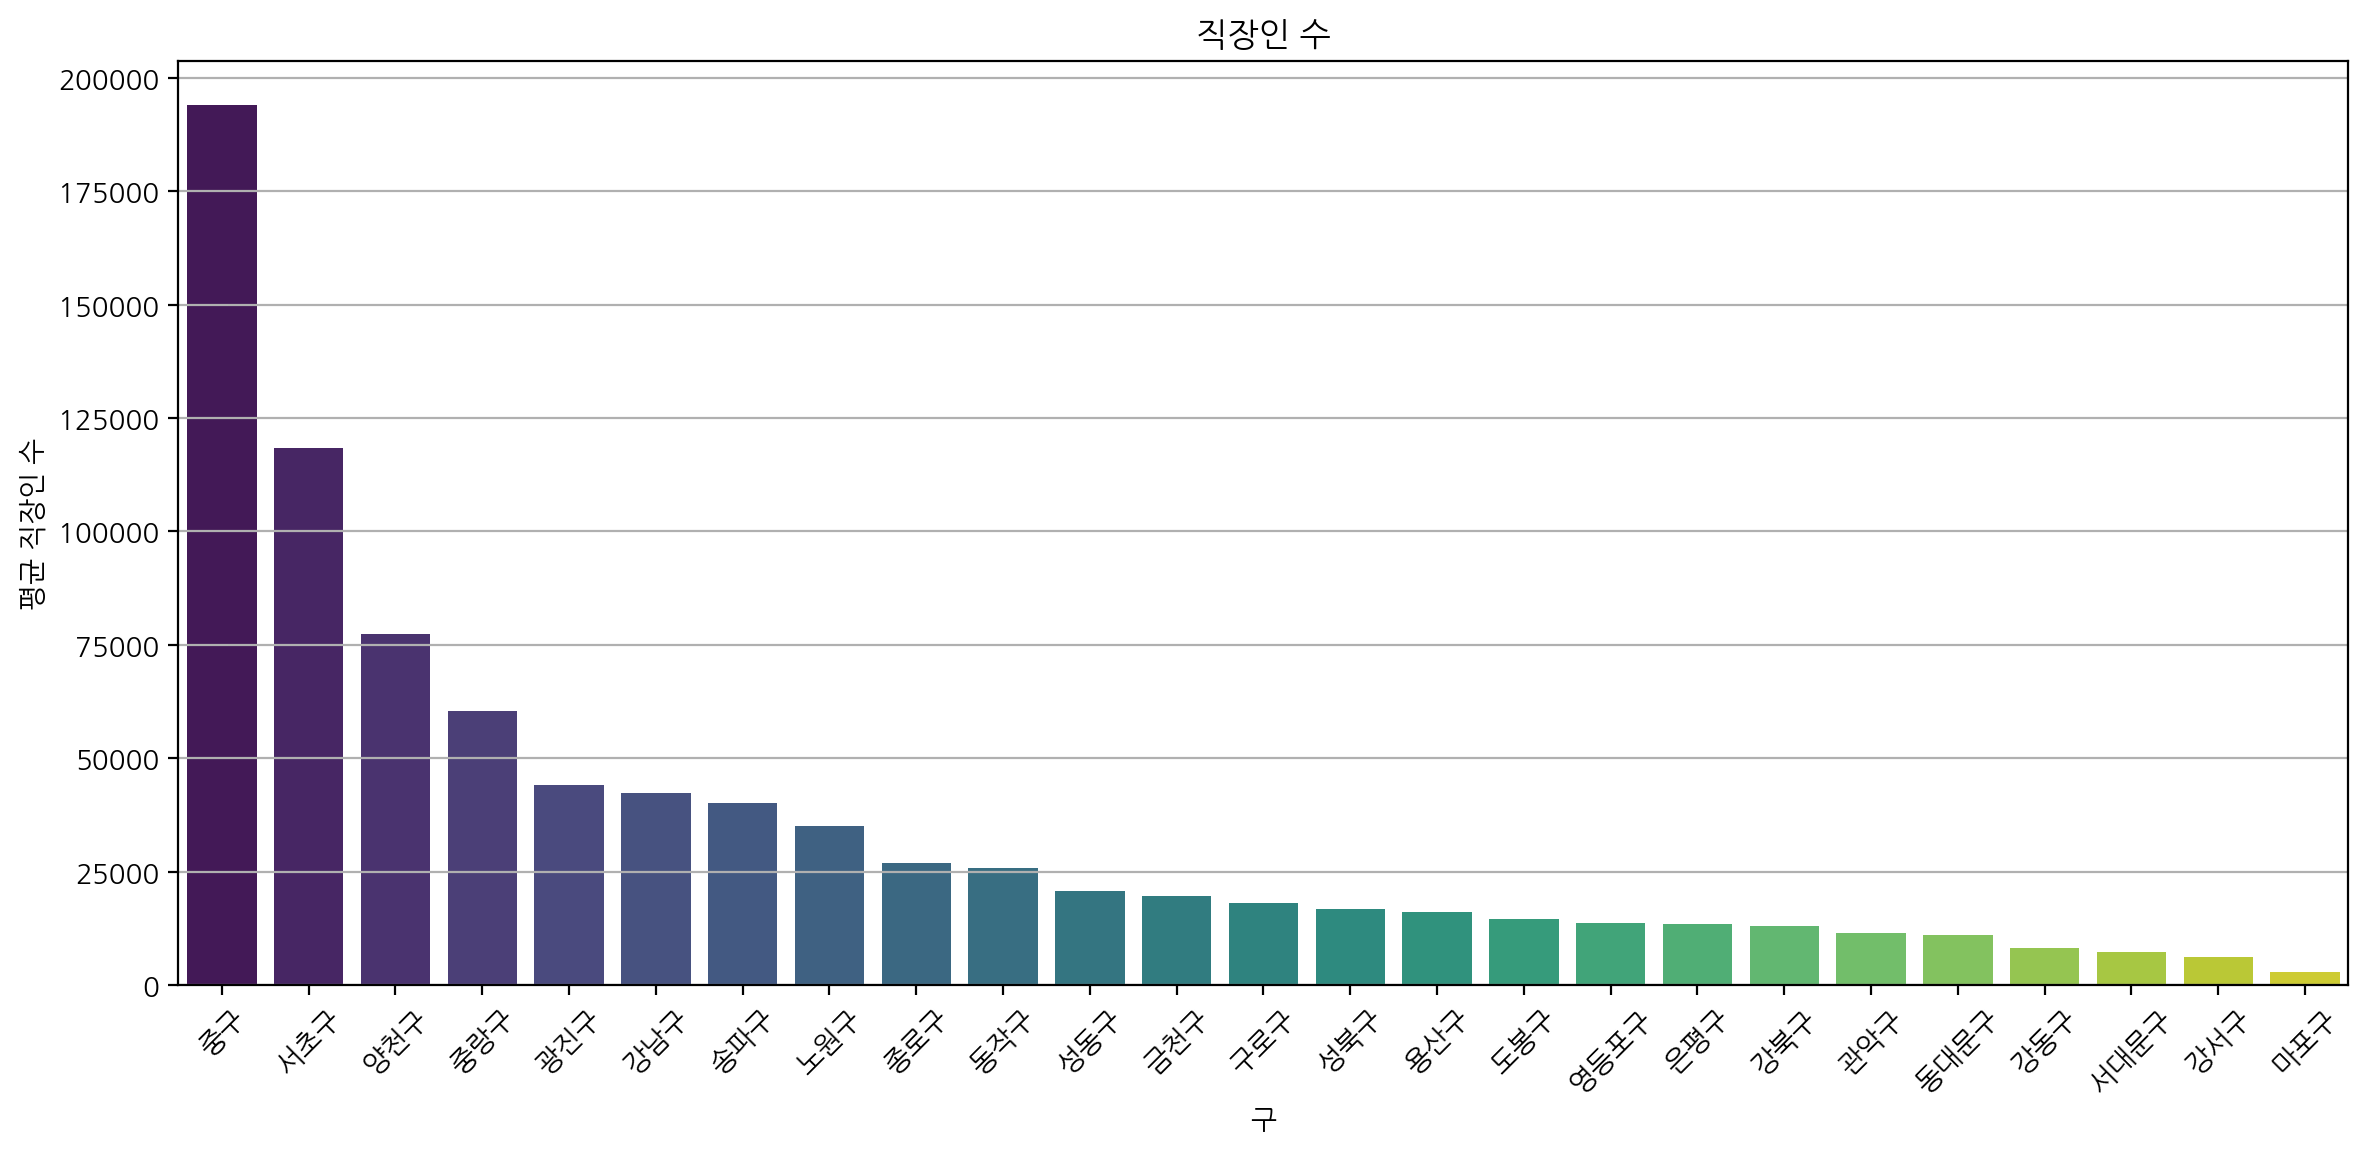

In [173]:
#자치구별 평균 직장인구수를 시각화
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x='자치구', y='총_직장_인구_수', data = df_job, palette='viridis').set_title("직장인 수")
ax.set(xlabel="구", ylabel = "평균 직장인 수")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

<Axes: xlabel='자치구', ylabel='직장인구_수'>

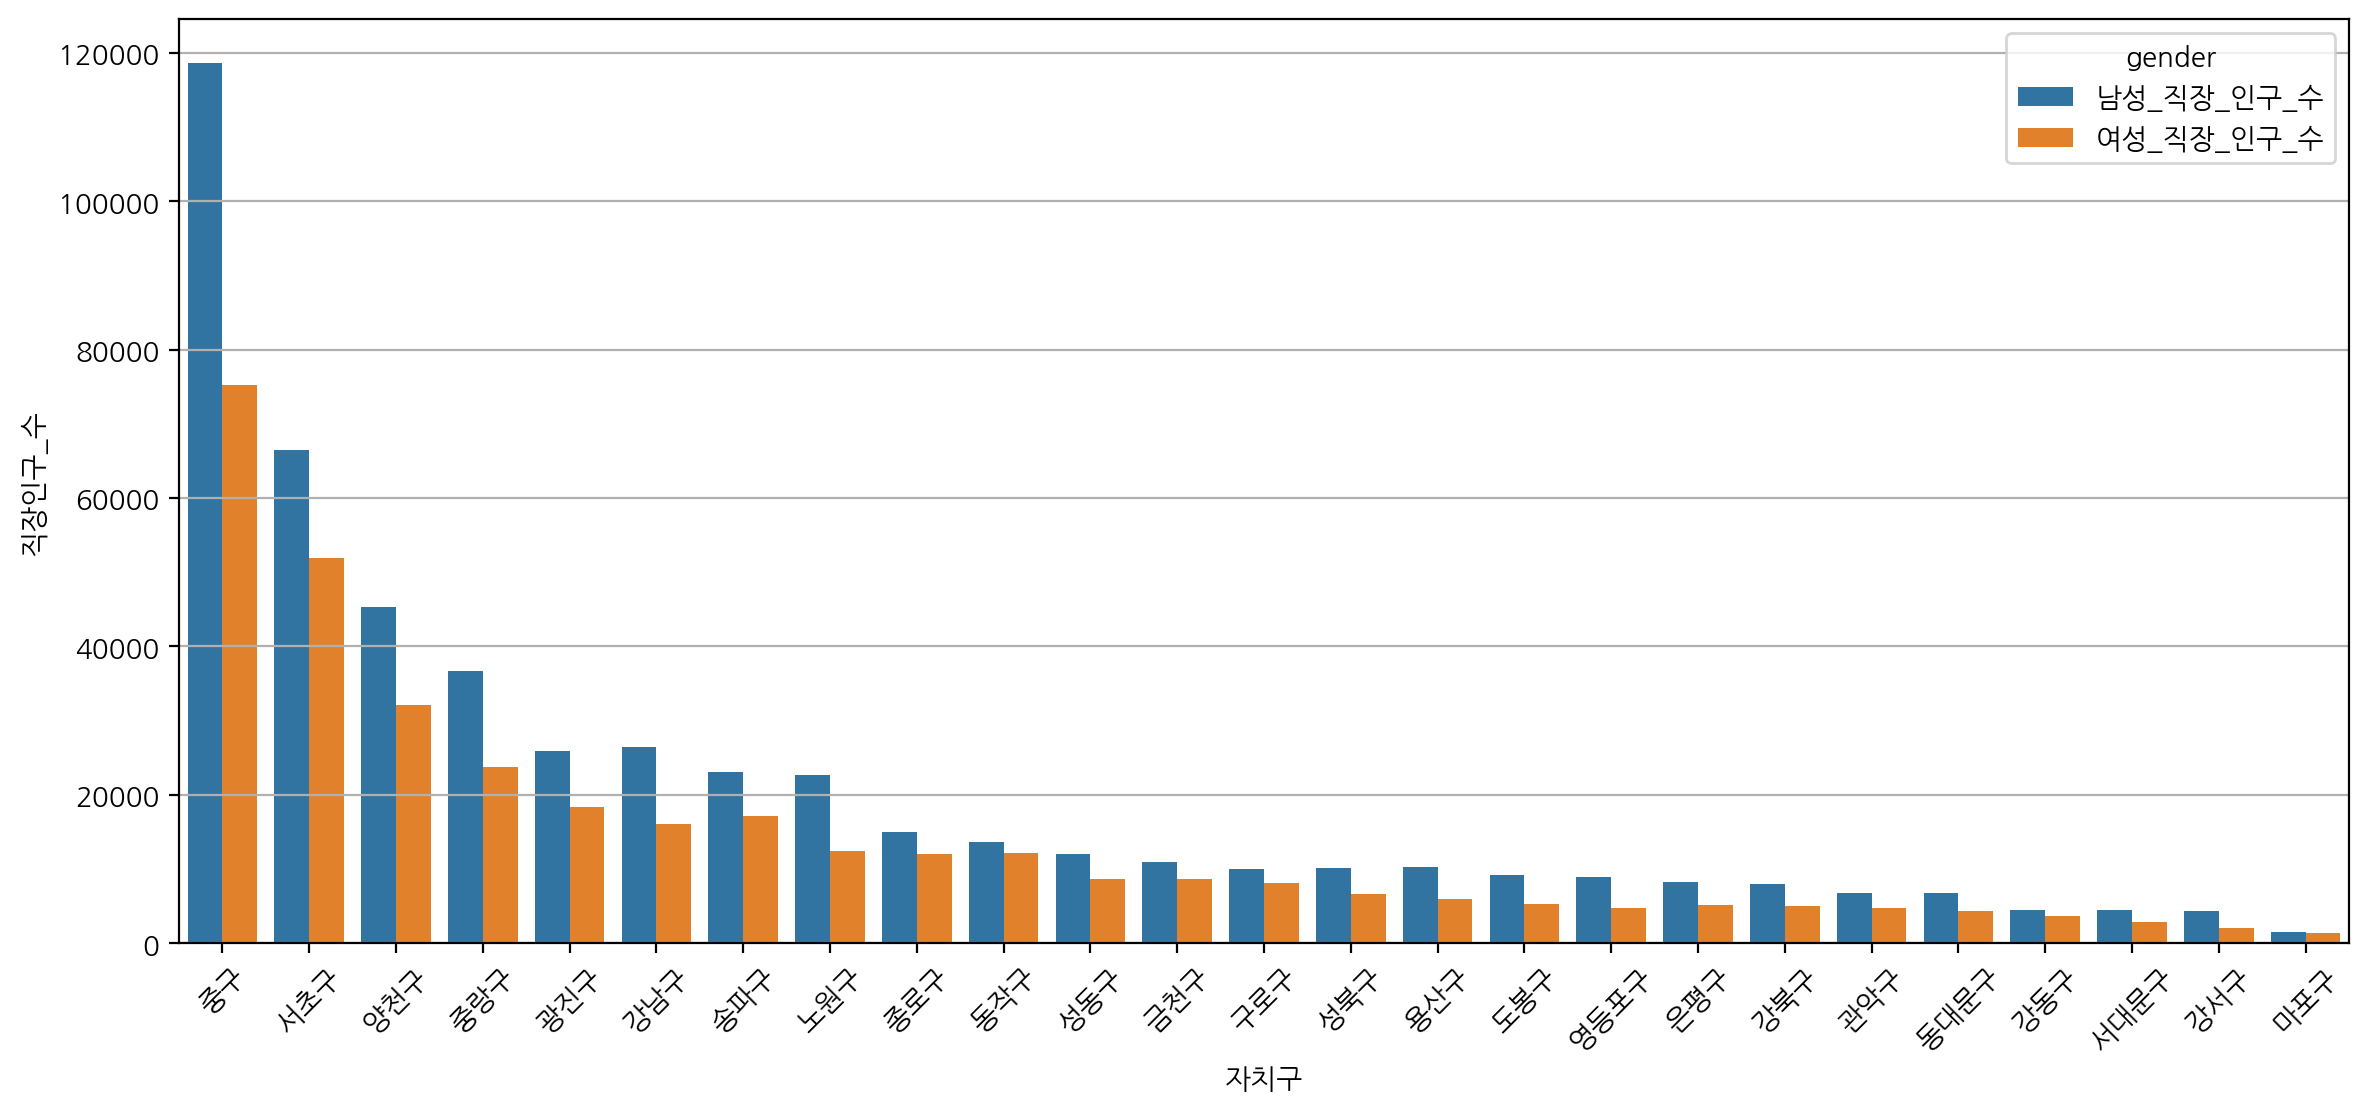

In [174]:
# df_job_new 데이터에 남녀속성을 추가해 자치구별 남녀 직장인수를 동시에 비교
# 모든 자치구에서 남자 직장인수가 더 많음을 알 수 있음

df_job_new = df_job.copy()
# DataFrame을 melt하여 gender 속성 추가
df_melted2 = df_job_new.melt(id_vars=['자치구'], value_vars=['남성_직장_인구_수', '여성_직장_인구_수'],
                        var_name='gender', value_name='직장인구_수')
df_melted2

plt.figure(figsize=(14, 6))
plt.xticks(rotation=45)
plt.grid(True, axis = 'y')
sns.barplot(df_melted2, x = '자치구', y = '직장인구_수', hue = 'gender')

In [175]:
#서울시 전체 직장인수 구하기
df_job_sum = df_job['총_직장_인구_수'].sum()
df_job_sum

858180.0

In [176]:
#상위5개 자치구의 직장인수 구하기
df_job_top5 = df_job.query('자치구 == "중구" | 자치구 == "서초구" | 자치구 == "양천구" |  자치구 == "중랑구" |  자치구 == "광진구"')['총_직장_인구_수'].sum()
df_job_top5

494444.0

In [177]:
#25개 자치구중 나머지 20개 자치구의 직장인 수 구하기
df_job_not = df_job_sum - df_job_top5
df_job_not

363736.0

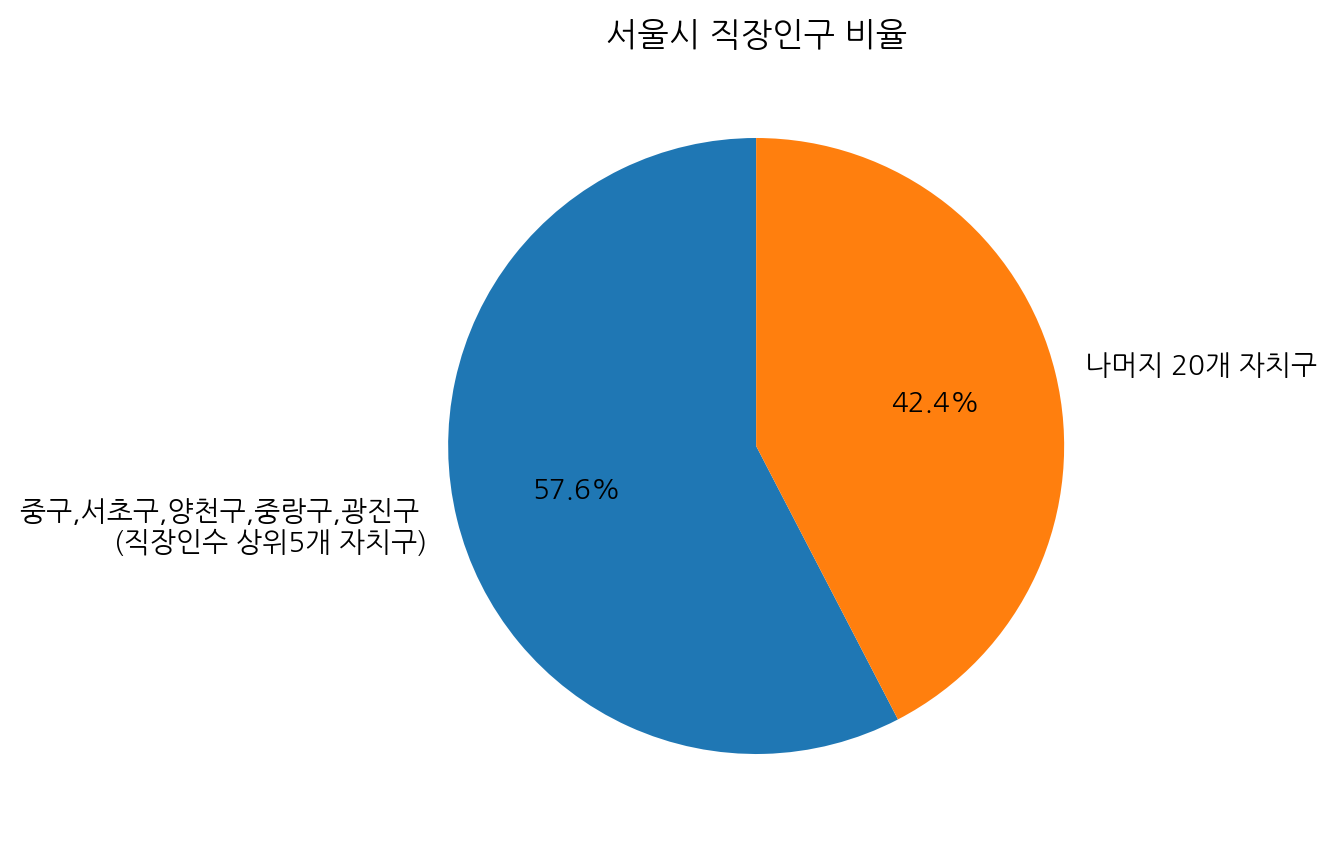

In [178]:
labels = ['중구,서초구,양천구,중랑구,광진구 \n (직장인수 상위5개 자치구)', '나머지 20개 자치구']
values = [df_job_top5/df_job_sum, df_job_not/df_job_sum]

plt.figure(figsize = (10, 5))
plt.pie(values, labels = labels, autopct = '%.1f%%', startangle = 90)
plt.title('서울시 직장인구 비율')
plt.show()
#서울시의 직장인구의 절반이 5개의 구에 몰려있음을 알 수 있음.

## 요일 별 유동인구 수 분석

In [179]:
df_week = df_tot[['자치구', '월요일_유동인구_수','화요일_유동인구_수','수요일_유동인구_수','목요일_유동인구_수','금요일_유동인구_수','토요일_유동인구_수', '일요일_유동인구_수']].groupby('자치구').mean().round()
df_week

,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
자치구,,,,,,,
강남구,10361194.0,10383522.0,10423683.0,10449998.0,10559805.0,10708431.0,10544989.0
강동구,10053678.0,10017491.0,10034572.0,10005980.0,10058213.0,10365114.0,10350934.0
강북구,9126401.0,9073921.0,9088982.0,9049583.0,9032447.0,9289271.0,9480714.0
강서구,1646130.0,1647974.0,1647900.0,1648287.0,1639472.0,1617886.0,1586326.0
관악구,17073322.0,16935544.0,16925986.0,16870914.0,16949973.0,17541444.0,17812609.0
광진구,7693962.0,7891716.0,7895530.0,7918365.0,7850605.0,7128316.0,6851525.0
구로구,10175317.0,10158517.0,10169720.0,10141691.0,10115390.0,10189519.0,10240755.0
금천구,13701087.0,13656123.0,13714281.0,13676356.0,13722779.0,13996008.0,14016890.0
노원구,7874950.0,7939668.0,8042970.0,8072182.0,8237220.0,8603732.0,8317230.0


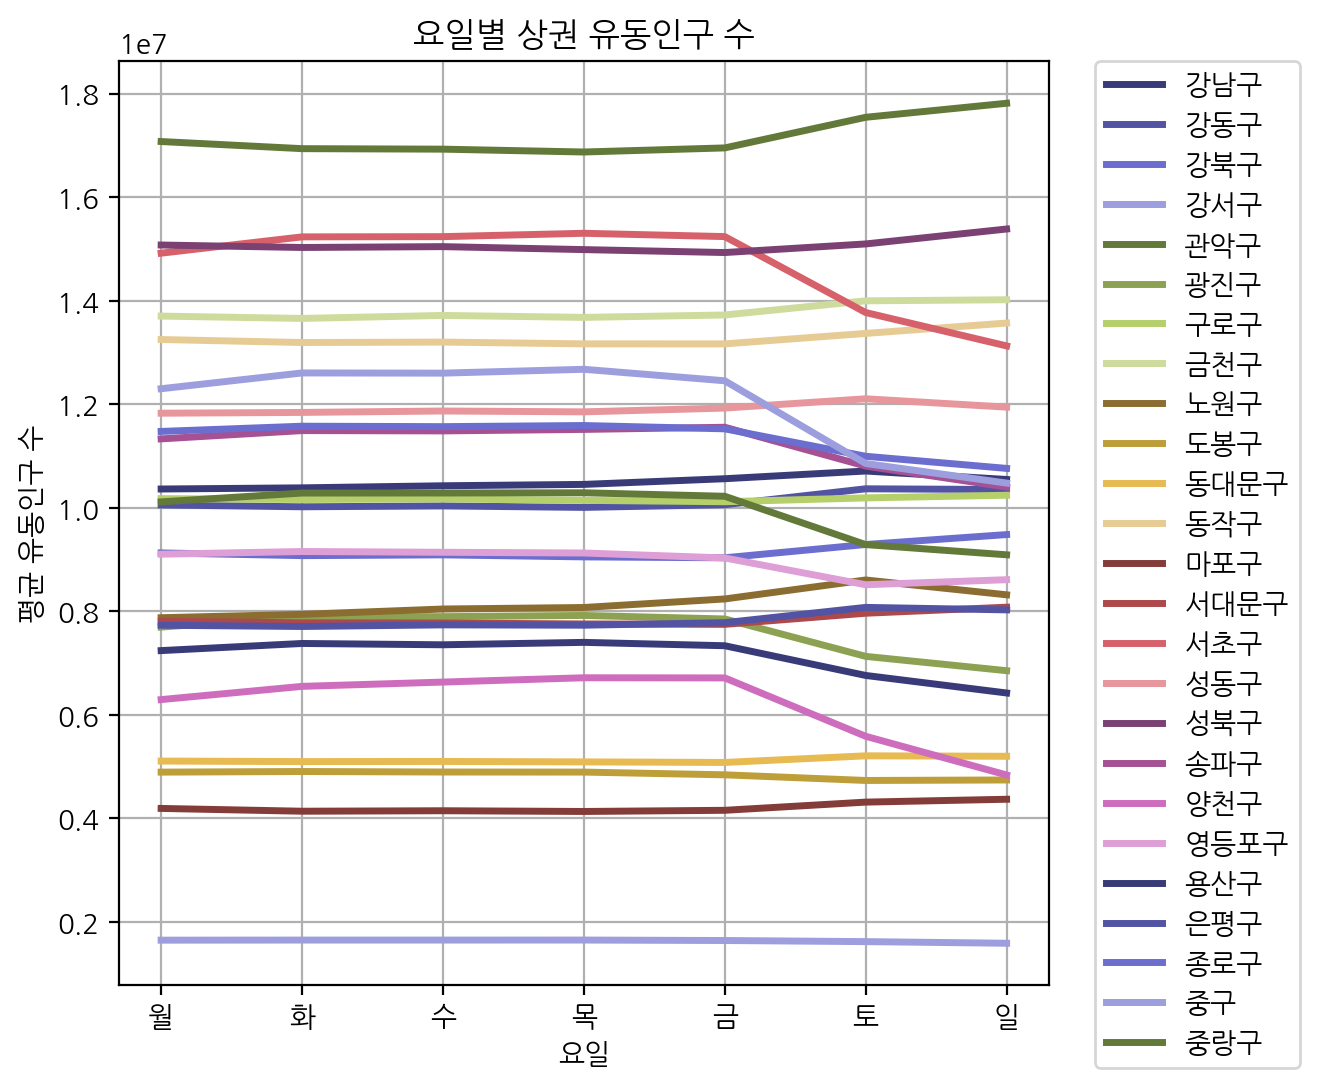

'\n1) 대부분 주말에 상권유동인구수가 줄어드는 경향을 띤다. 특히 직장인비율이 높았던 서초구와 중구가 주말에 급격하게 상권 유동인구가 줄어듦\n      ->  주말보다는 평일장사에 집중하는게 좋다. 특히 직장인이 많은 중구나 서초구에서는 주말장사는 힘들 수 있음.\n\n2) 관악구는 특이하게 주말에 상권유동인구수가 증가했는데, 관악구는 직장인비율은 낮지만 유동인구가 자치구중에 가장 많았다.\n  그 말은 관악구로일하러 오는 사람보다 관악구에서 실거주하고있는 상주인구가 많음을 유추 할 수 있음.\n  -> 실제로 서초,강남에서 일하는 직장인들이 집값떄문에 거리상 가깝지만\n    비교적 집값이 저렴한 관악구에서 많이 산다'

In [180]:
df_week_a = df_week.columns = ['월','화','수','목','금','토','일']

fig, ax = plt.subplots(figsize=(6, 6))
plt.axis='scaled'
sns.lineplot(data=df_week.T, palette = 'tab20b', linewidth=2.5, dashes=False, sort=False).set_title("요일별 상권 유동인구 수")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel="요일", ylabel = "평균 유동인구 수")
plt.grid(True)
plt.show()
#여기서 알 수 있는 내용:
'''
1) 대부분 주말에 상권유동인구수가 줄어드는 경향을 띤다. 특히 직장인비율이 높았던 서초구와 중구가 주말에 급격하게 상권 유동인구가 줄어듦
      ->  주말보다는 평일장사에 집중하는게 좋다. 특히 직장인이 많은 중구나 서초구에서는 주말장사는 힘들 수 있음.

2) 관악구는 특이하게 주말에 상권유동인구수가 증가했는데, 관악구는 직장인비율은 낮지만 유동인구가 자치구중에 가장 많았다.
  그 말은 관악구로일하러 오는 사람보다 관악구에서 실거주하고있는 상주인구가 많음을 유추 할 수 있음.
  -> 실제로 서초,강남에서 일하는 직장인들이 집값떄문에 거리상 가깝지만
    비교적 집값이 저렴한 관악구에서 많이 산다'''


## 연령대별 유동인구수 분석

In [181]:
df_age_pop = df_tot[['자치구', '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수']]\
.groupby('자치구',as_index = True).mean().round()
df_age_pop

,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수
자치구,,,,,
강남구,8212685.0,16181088.0,14947308.0,11438576.0,9507165.0
강동구,9786343.0,13265237.0,10886969.0,10241782.0,10386229.0
강북구,9579158.0,9124987.0,10616457.0,10137872.0,9529275.0
강서구,2331768.0,1315034.0,1560332.0,1938876.0,1764030.0
관악구,15894290.0,18086758.0,19144918.0,18700780.0,18106658.0
광진구,7405608.0,11713151.0,9507461.0,8878862.0,6788857.0
구로구,12111037.0,10705063.0,12581606.0,11773345.0,9273476.0
금천구,9614178.0,22233525.0,17849189.0,14055615.0,13177567.0
노원구,6824674.0,13633402.0,10655018.0,8938723.0,7327332.0


In [182]:
#각 자치구별 연령별 유동인구의 최댓값을 찾기
df_age_max = df_age_pop.idxmax(axis=1)
print(df_age_max)

자치구
강남구     연령대_20_유동인구_수
강동구     연령대_20_유동인구_수
강북구     연령대_30_유동인구_수
강서구     연령대_10_유동인구_수
관악구     연령대_30_유동인구_수
광진구     연령대_20_유동인구_수
구로구     연령대_30_유동인구_수
금천구     연령대_20_유동인구_수
노원구     연령대_20_유동인구_수
도봉구     연령대_30_유동인구_수
동대문구    연령대_20_유동인구_수
동작구     연령대_30_유동인구_수
마포구     연령대_50_유동인구_수
서대문구    연령대_20_유동인구_수
서초구     연령대_30_유동인구_수
성동구     연령대_20_유동인구_수
성북구     연령대_30_유동인구_수
송파구     연령대_30_유동인구_수
양천구     연령대_40_유동인구_수
영등포구    연령대_30_유동인구_수
용산구     연령대_20_유동인구_수
은평구     연령대_20_유동인구_수
종로구     연령대_50_유동인구_수
중구      연령대_30_유동인구_수
중랑구     연령대_30_유동인구_수
dtype: object


In [183]:
df_age_max.value_counts()
#이걸 보면 2,30대의 유동인구 수가 서울 전체적으로 가장많다라고 볼 수 있다.

연령대_30_유동인구_수    11
연령대_20_유동인구_수    10
연령대_50_유동인구_수     2
연령대_10_유동인구_수     1
연령대_40_유동인구_수     1
Name: count, dtype: int64

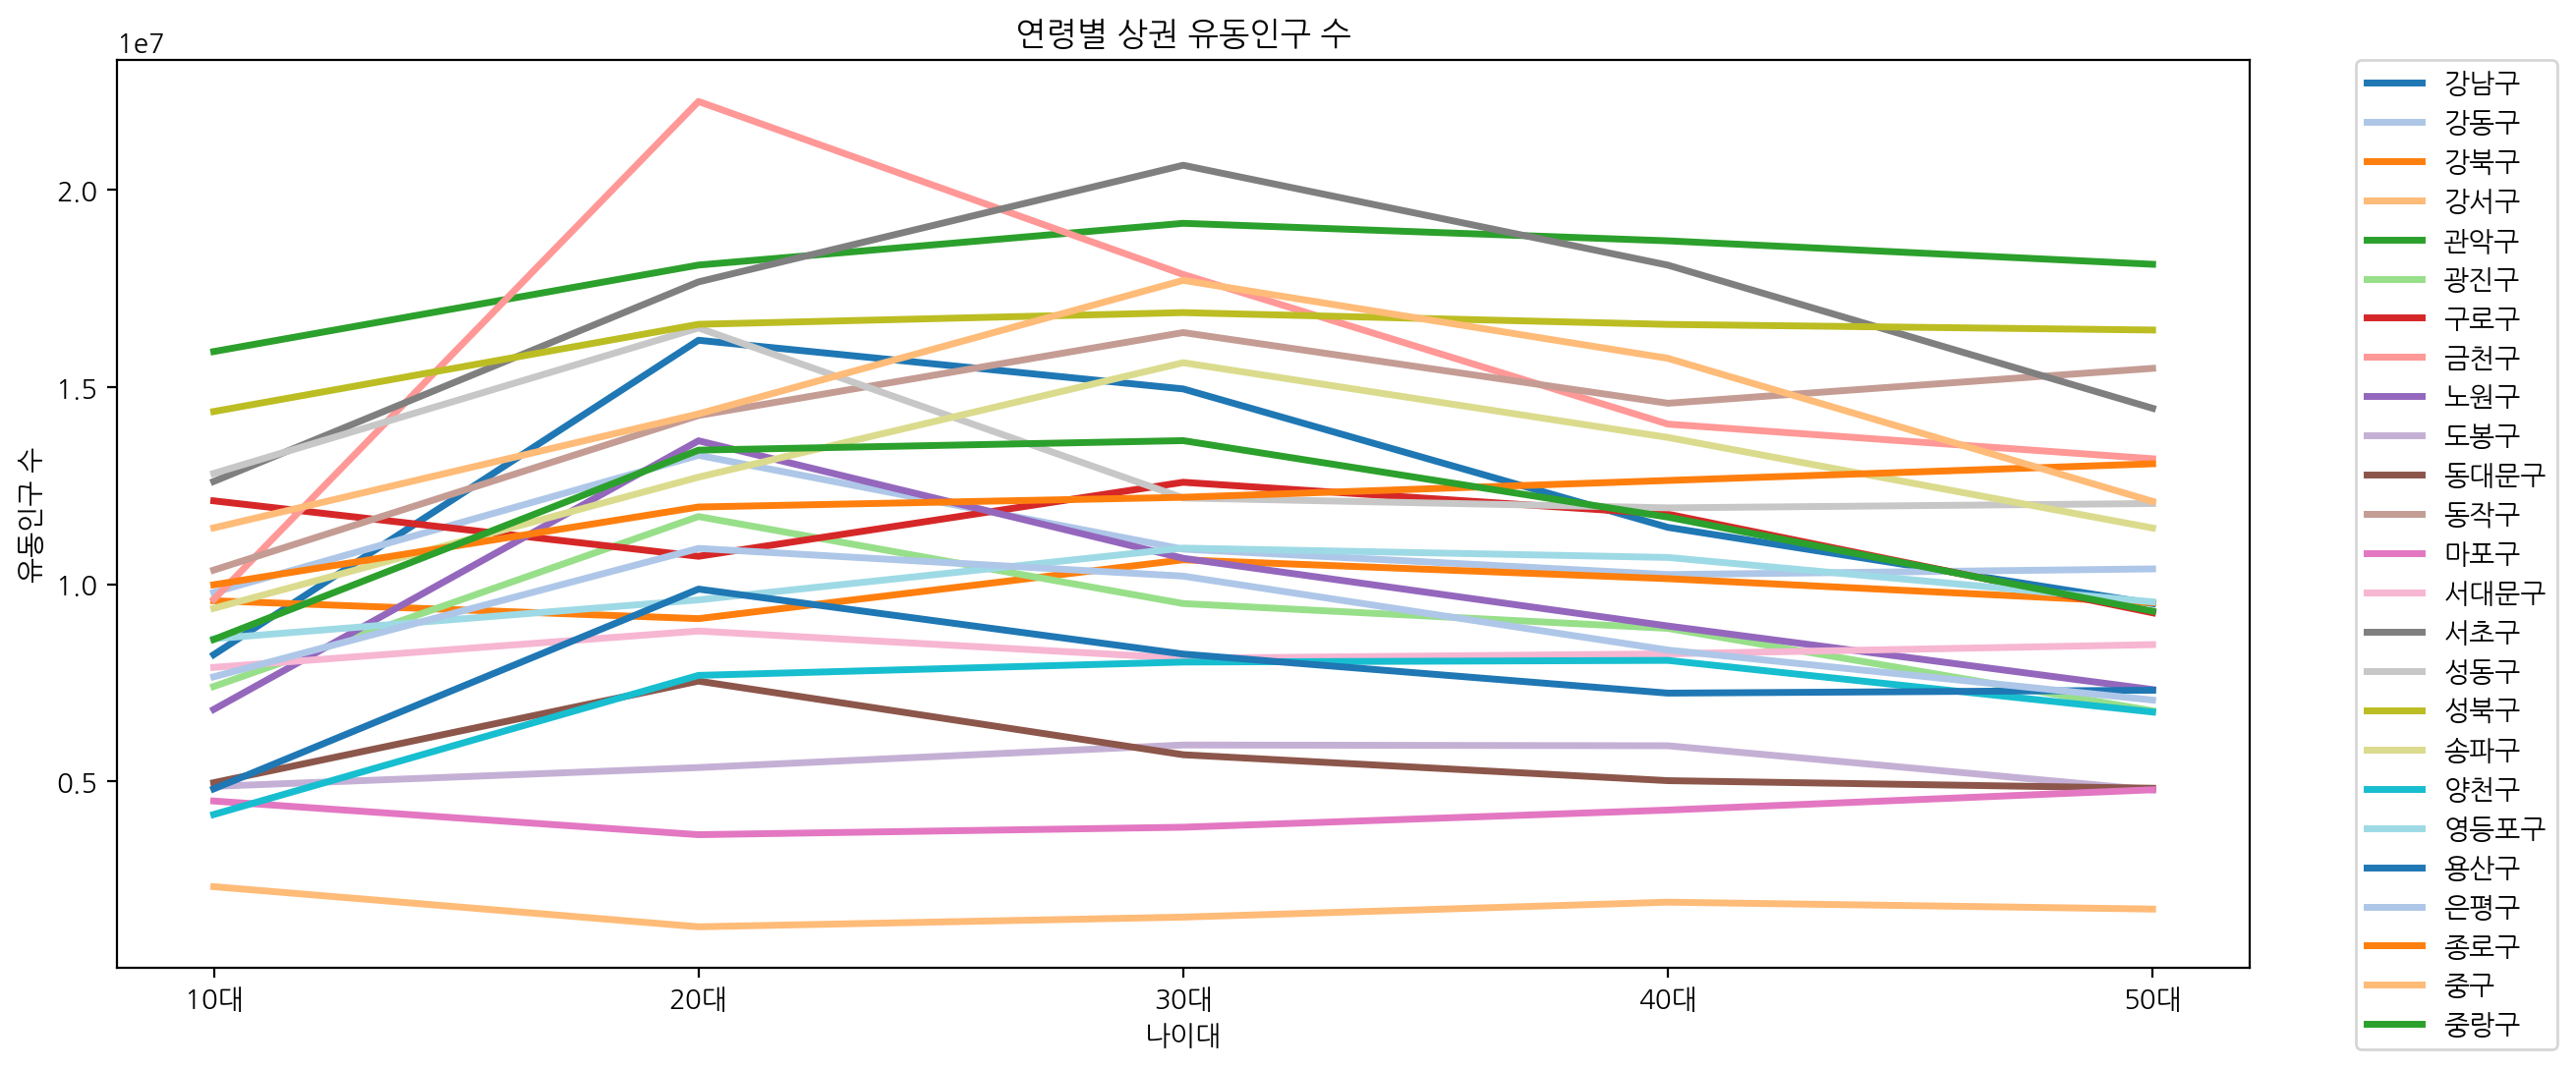

In [184]:
# 자치구별 상권 유동인구수의 연령대 분포를 시각화
df_age_pop.columns = ['10대','20대','30대','40대','50대']
fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data=df_age_pop.T, palette="tab20", linewidth=2.5, dashes=False, sort=False).set_title("연령별 상권 유동인구 수")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel="나이대", ylabel = "유동인구 수")
plt.show()

## 자치구 별 월 매출 금액 비교분석

In [185]:
df_sales = df_tot[['자치구','당월_매출_금액']].groupby('자치구',as_index=False).mean().round().sort_values('당월_매출_금액',ascending=False)
df_sales

,자치구,당월_매출_금액
23,중구,4.511070e+12
14,서초구,2.201309e+12
11,동작구,2.067442e+12
10,동대문구,1.962001e+12
18,양천구,1.624028e+12
20,용산구,1.593386e+12
17,송파구,1.552553e+12
0,강남구,1.501401e+12
5,광진구,1.113410e+12
22,종로구,1.053122e+12


<ipython-input-186-911e81d269c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="당월_매출_금액", y="자치구", data=df_sales, orient='h', palette='viridis', ax=ax)


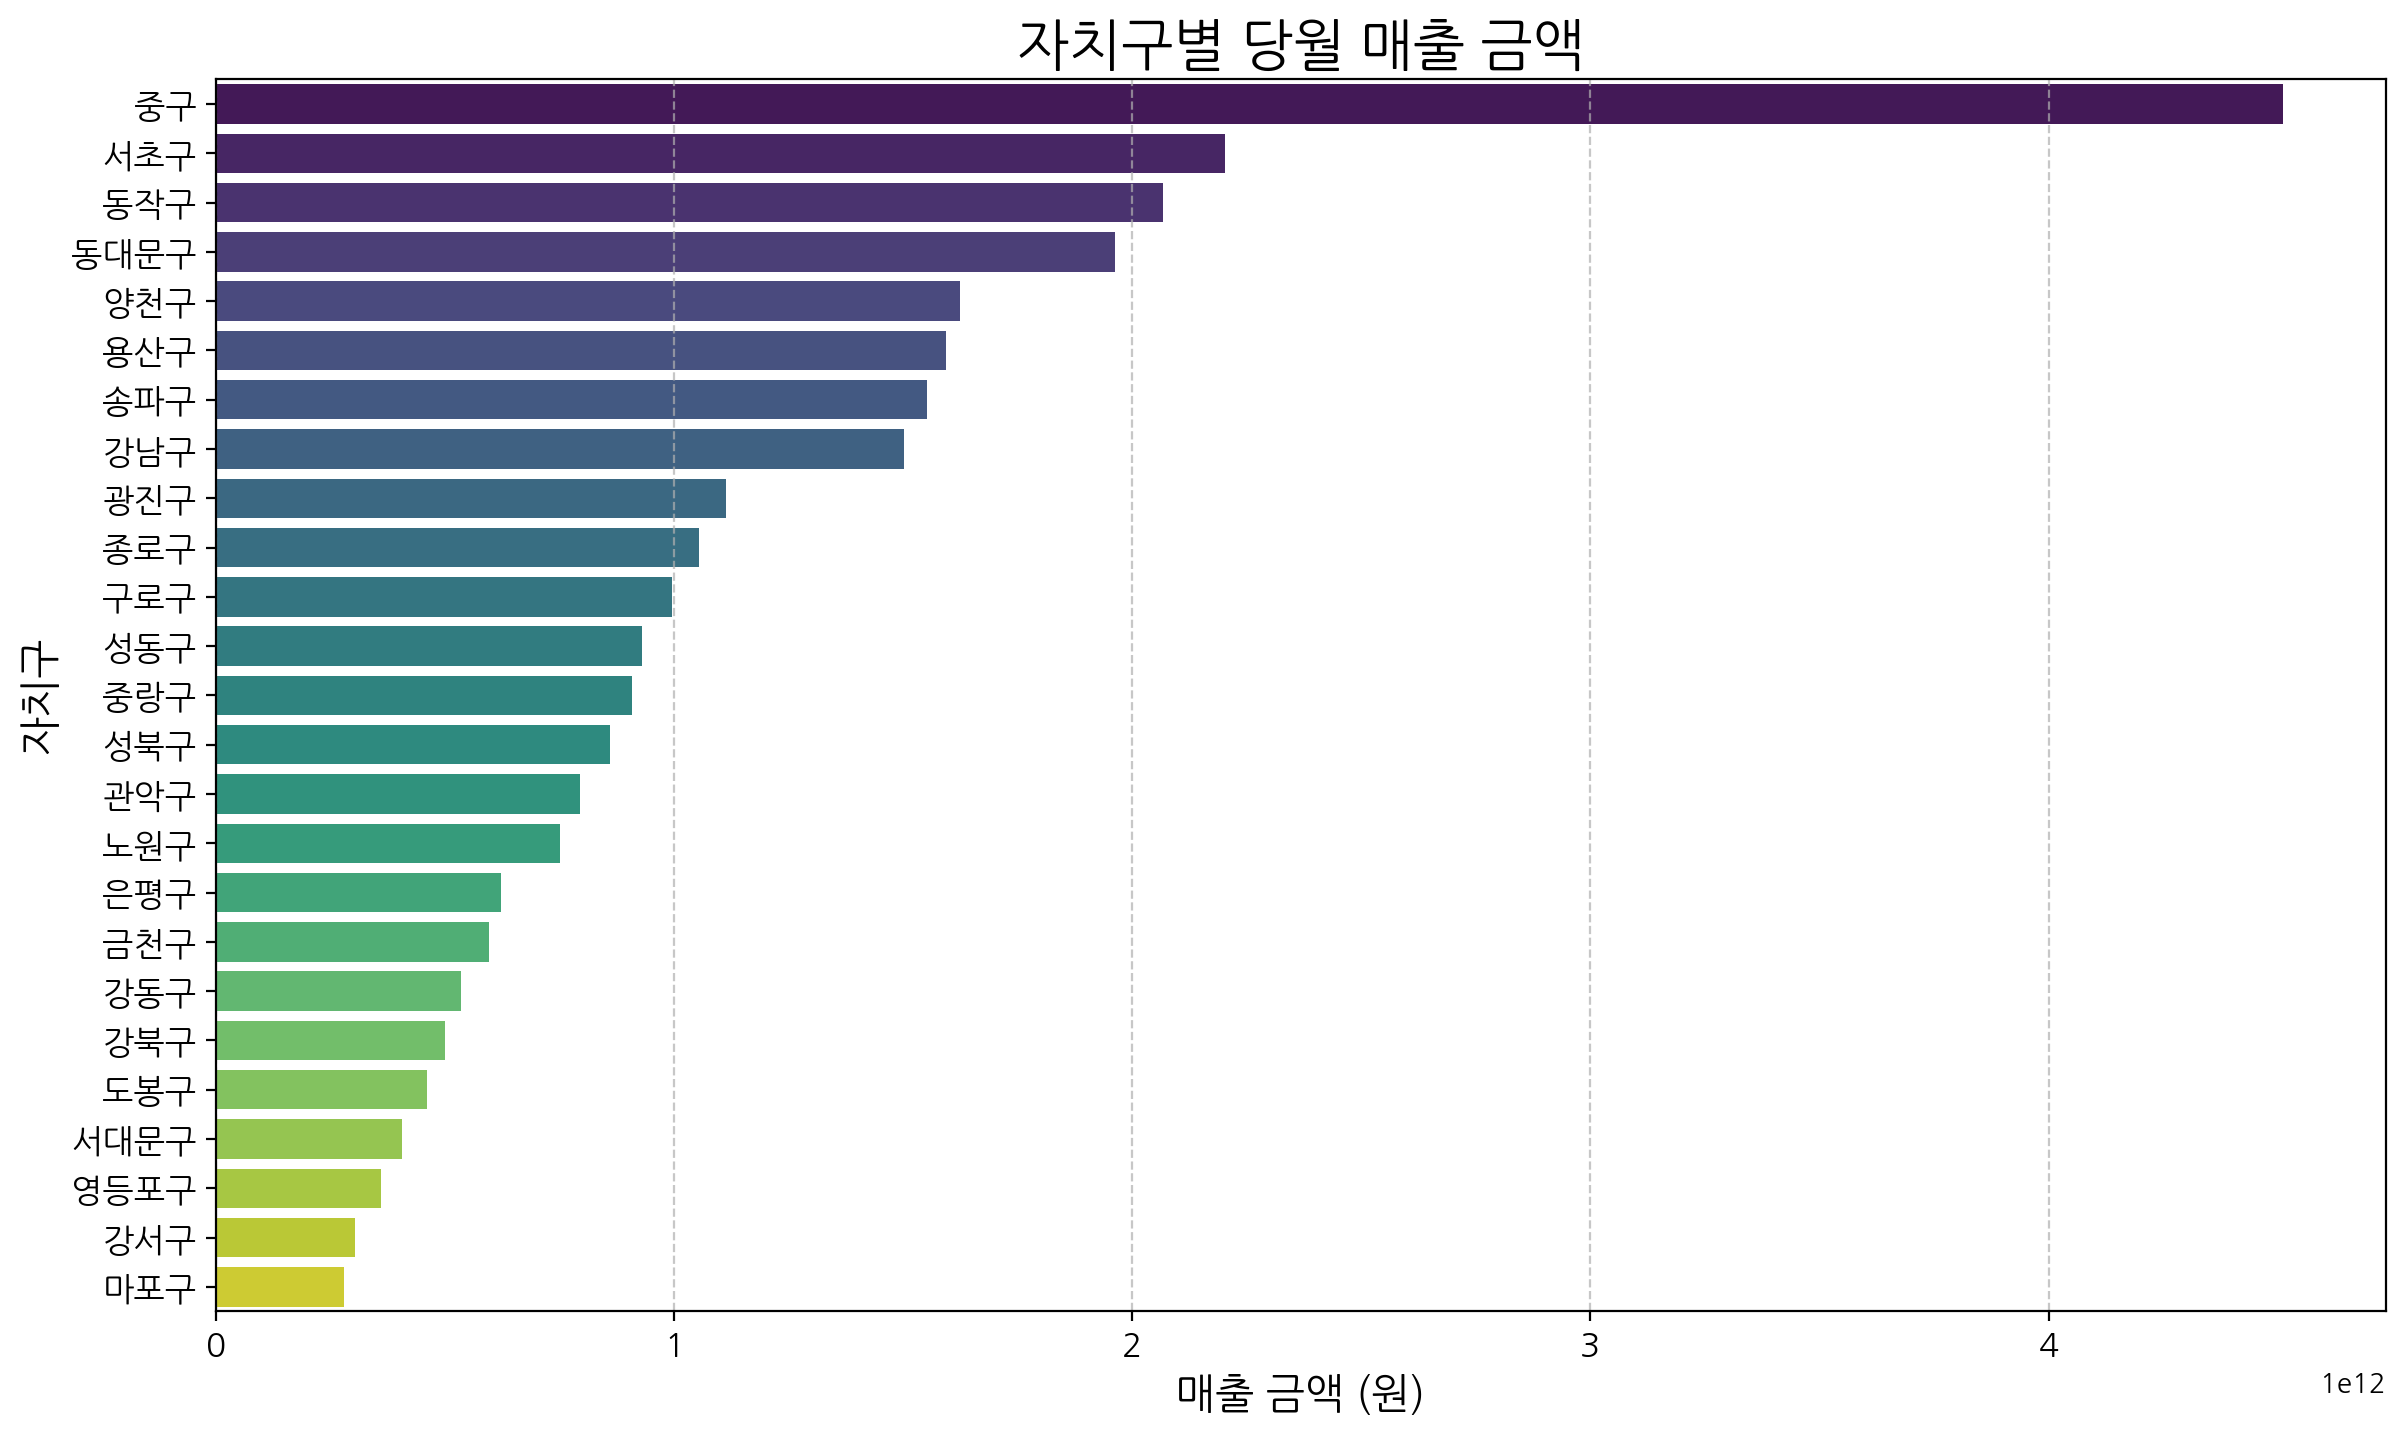

In [186]:
#자치구별 평균매출금액 시각화

# 플롯 생성
fig, ax = plt.subplots(figsize=(14, 8))  # 화면 크기 설정

# 가로 막대 그래프 생성
sns.barplot(x="당월_매출_금액", y="자치구", data=df_sales, orient='h', palette='viridis', ax=ax)

# 제목과 레이블 설정
ax.set_title("자치구별 당월 매출 금액", fontsize=20)
ax.set_xlabel("매출 금액 (원)", fontsize=15)
ax.set_ylabel("자치구", fontsize=15)

# 축 라벨의 글자 크기 설정
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 그리드 추가
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# 플롯 표시
plt.show()

In [187]:
# 자치구별 20,30대 젊은연령층의 유동인구수만 따로 빼서 df_2030age에 저장
df_age_pop.copy = df_tot[['자치구', '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수']]\
.groupby('자치구',as_index = False).mean().round()
df_age_pop.copy['20,30대_유동인구수'] = df_age_pop.copy['연령대_20_유동인구_수'] + df_age_pop.copy['연령대_30_유동인구_수']
df_2030age = df_age_pop.copy[['자치구','20,30대_유동인구수']].sort_values('20,30대_유동인구수',ascending = False)
df_2030age

df_job_new = df_job[['자치구','총_직장_인구_수']]

In [188]:
#자치구별 매출금액, 총직장인구수, 20,30대 유동인구수 데이터프레임 확인
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)


display_side_by_side(df_sales, df_job_new, df_2030age)

,자치구,당월_매출_금액
23,중구,4.511070e+12
14,서초구,2.201309e+12
11,동작구,2.067442e+12
10,동대문구,1.962001e+12
18,양천구,1.624028e+12
20,용산구,1.593386e+12
17,송파구,1.552553e+12
0,강남구,1.501401e+12
5,광진구,1.113410e+12
22,종로구,1.053122e+12


In [189]:
#'자치구'컬럼을 기준으로 데이터프레임 병합
merged_df = pd.merge(df_sales, df_job_new, on='자치구')
merged_df = pd.merge(merged_df, df_2030age, on='자치구')
merged_df

,자치구,당월_매출_금액,총_직장_인구_수,"20,30대_유동인구수"
0,중구,4.511070e+12,193936.0,32013706.0
1,서초구,2.201309e+12,118427.0,38277124.0
2,동작구,2.067442e+12,25755.0,30650443.0
3,동대문구,1.962001e+12,11093.0,13217582.0
4,양천구,1.624028e+12,77459.0,15711967.0
5,용산구,1.593386e+12,16174.0,18101432.0
6,송파구,1.552553e+12,40170.0,28323393.0
7,강남구,1.501401e+12,42431.0,31128396.0
8,광진구,1.113410e+12,44200.0,21220612.0
9,종로구,1.053122e+12,26960.0,24155524.0


## 총 직장인구수와 점포의 매출금액 // 20,30대의 유동인구수와 점포의 매출금액간 상관관계를 조사
---
- 피어스만 상관계수(pearson correlation)
  - 양적 상관관계 : 정비례
  - 음적 상관관계 : 반비례
---
|피어스만 상관계수|관계해석|
|---|---|
|+0.7 ~ +1.0|**강한 양적 상관관계**</span>|
|+0.3 ~ +0.7|**뚜렷한 양적 상관관계**|
|+0.1 ~ +0.3|약한 양적 상관관계|
|-0.1 ~ +0.1|상관관계 거의 없음|
|-1.0 ~ -0.7|강한 음적 상관관계|
|-0.7 ~ -0.3|뚜렷한 음적 상관관계|
|-0.3 ~ -0.1|약한 음적 상관관계|



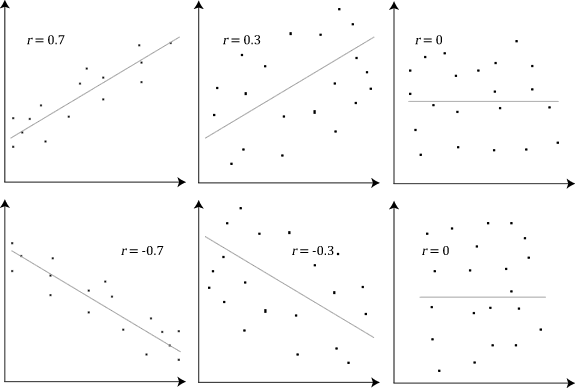

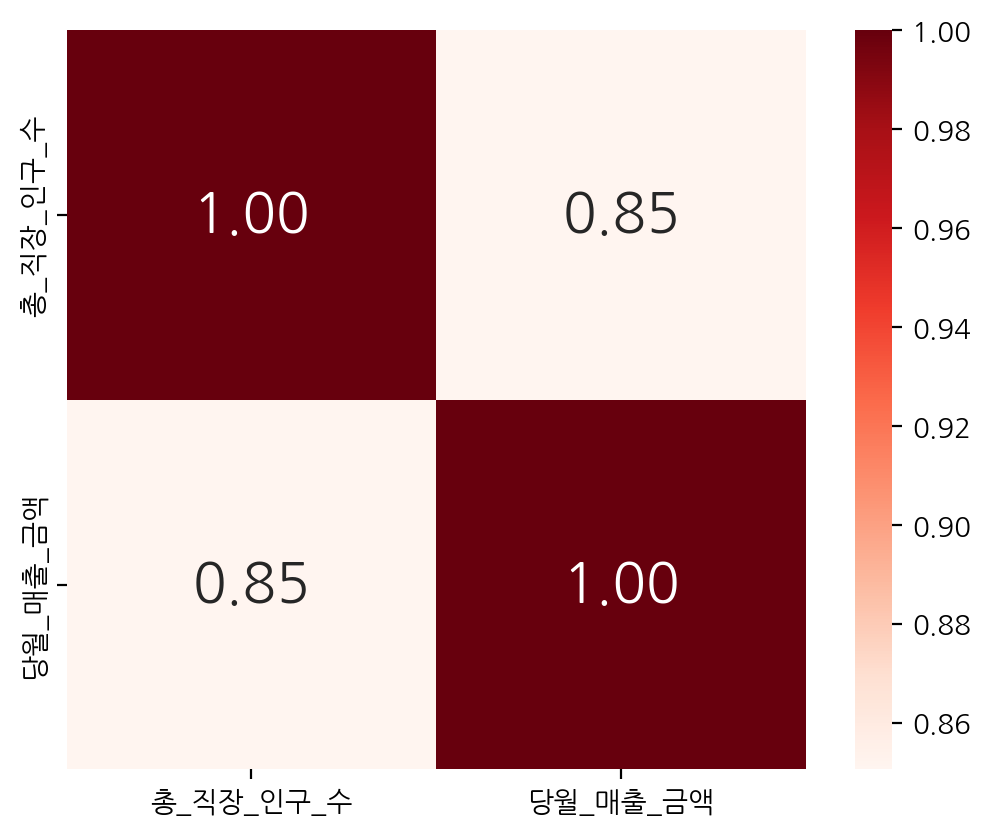

In [190]:
corr = merged_df[["총_직장_인구_수","당월_매출_금액"]].corr(method = 'pearson')
hmp1 = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Reds')
# 총직장인구수와 메출금액 사이의 상관계수가 0.85로 강한 양적 상관관계를 갖고 있는것으로 판단할 수 있음
# 직장인구수가 많은 자치구에 사업을 시작하는 것이 유리할 수 있음.

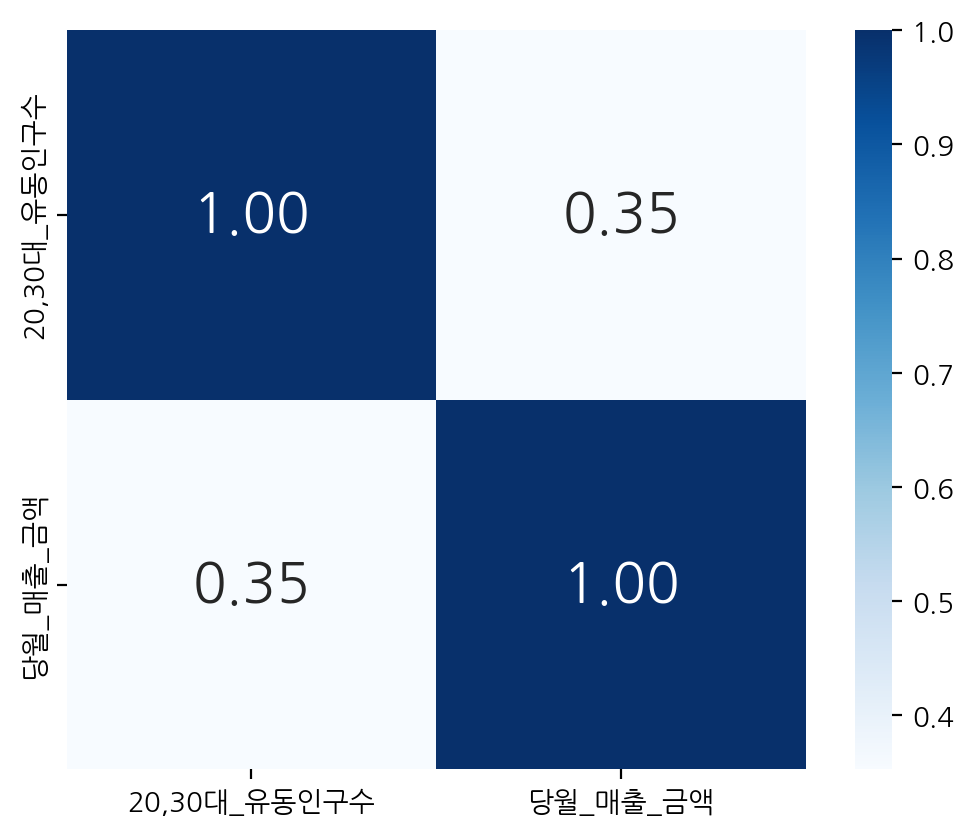

In [191]:
corr = merged_df[["20,30대_유동인구수","당월_매출_금액"]].corr(method = 'pearson')
hmp2 = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')
# 20,30대 유동인구수와 메출금액 사이의 상관계수가 0.35로 뚜렷한 양적 상관관계를 갖고 있는것으로 판단할 수 있음
# 직장인구수가 많은 자치구에 사업을 시작하는 것이 유리할 수 있음.